In [1]:
# Importing libraries
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data statistics
import scipy.stats as stats

# Disable python warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
house_df = pd.read_csv('Housing.csv')
# Display top & last 5 rows of data and shape of data
house_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## I made a few strategies to deal with data like:


### 1. Understanding Data

### 2. EDA

### 3. Data Preprocessing

### 4. Model Building, Validation & Evaluation

### 5. Model Testing

### 6. Model Improvement

## 1. Understanding Data

In [3]:
# Check rows & columns shape of data
house_df.shape

(545, 13)

In [4]:
# Check null/missing values in data
house_df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# Check duplicate rows of data
house_df.duplicated().sum()

0

In [6]:
# Check dtypes & info of data
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Numerical columns
num = [cols for cols in house_df.columns if (house_df[cols].dtype == 'int64')]
# Lis of Num cols
num

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [8]:
# Categorical columns
cat = [col for col in house_df.columns if (house_df[col].dtype == 'object')]
# List of Cat cols
cat

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [9]:
# Display random rows of data
house_df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
100,6230000,6600,3,2,1,yes,no,yes,no,yes,0,yes,unfurnished
509,2590000,3600,2,2,2,yes,no,yes,no,no,1,no,furnished
361,3710000,6020,3,1,1,yes,no,no,no,no,0,no,semi-furnished
369,3675000,3600,2,1,1,yes,no,no,no,no,0,no,furnished
51,7420000,6325,3,1,4,yes,no,no,no,yes,1,no,unfurnished
117,5950000,3700,4,1,2,yes,yes,no,no,yes,0,no,furnished
132,5810000,5200,3,1,3,yes,no,no,no,yes,0,no,semi-furnished
162,5460000,6600,4,2,2,yes,yes,yes,no,no,0,yes,semi-furnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
190,5040000,7600,4,1,2,yes,no,no,no,yes,2,no,furnished


In [10]:
# Describe function to see the data
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## 2. EDA

### i. Univariant Analysis on numerical data

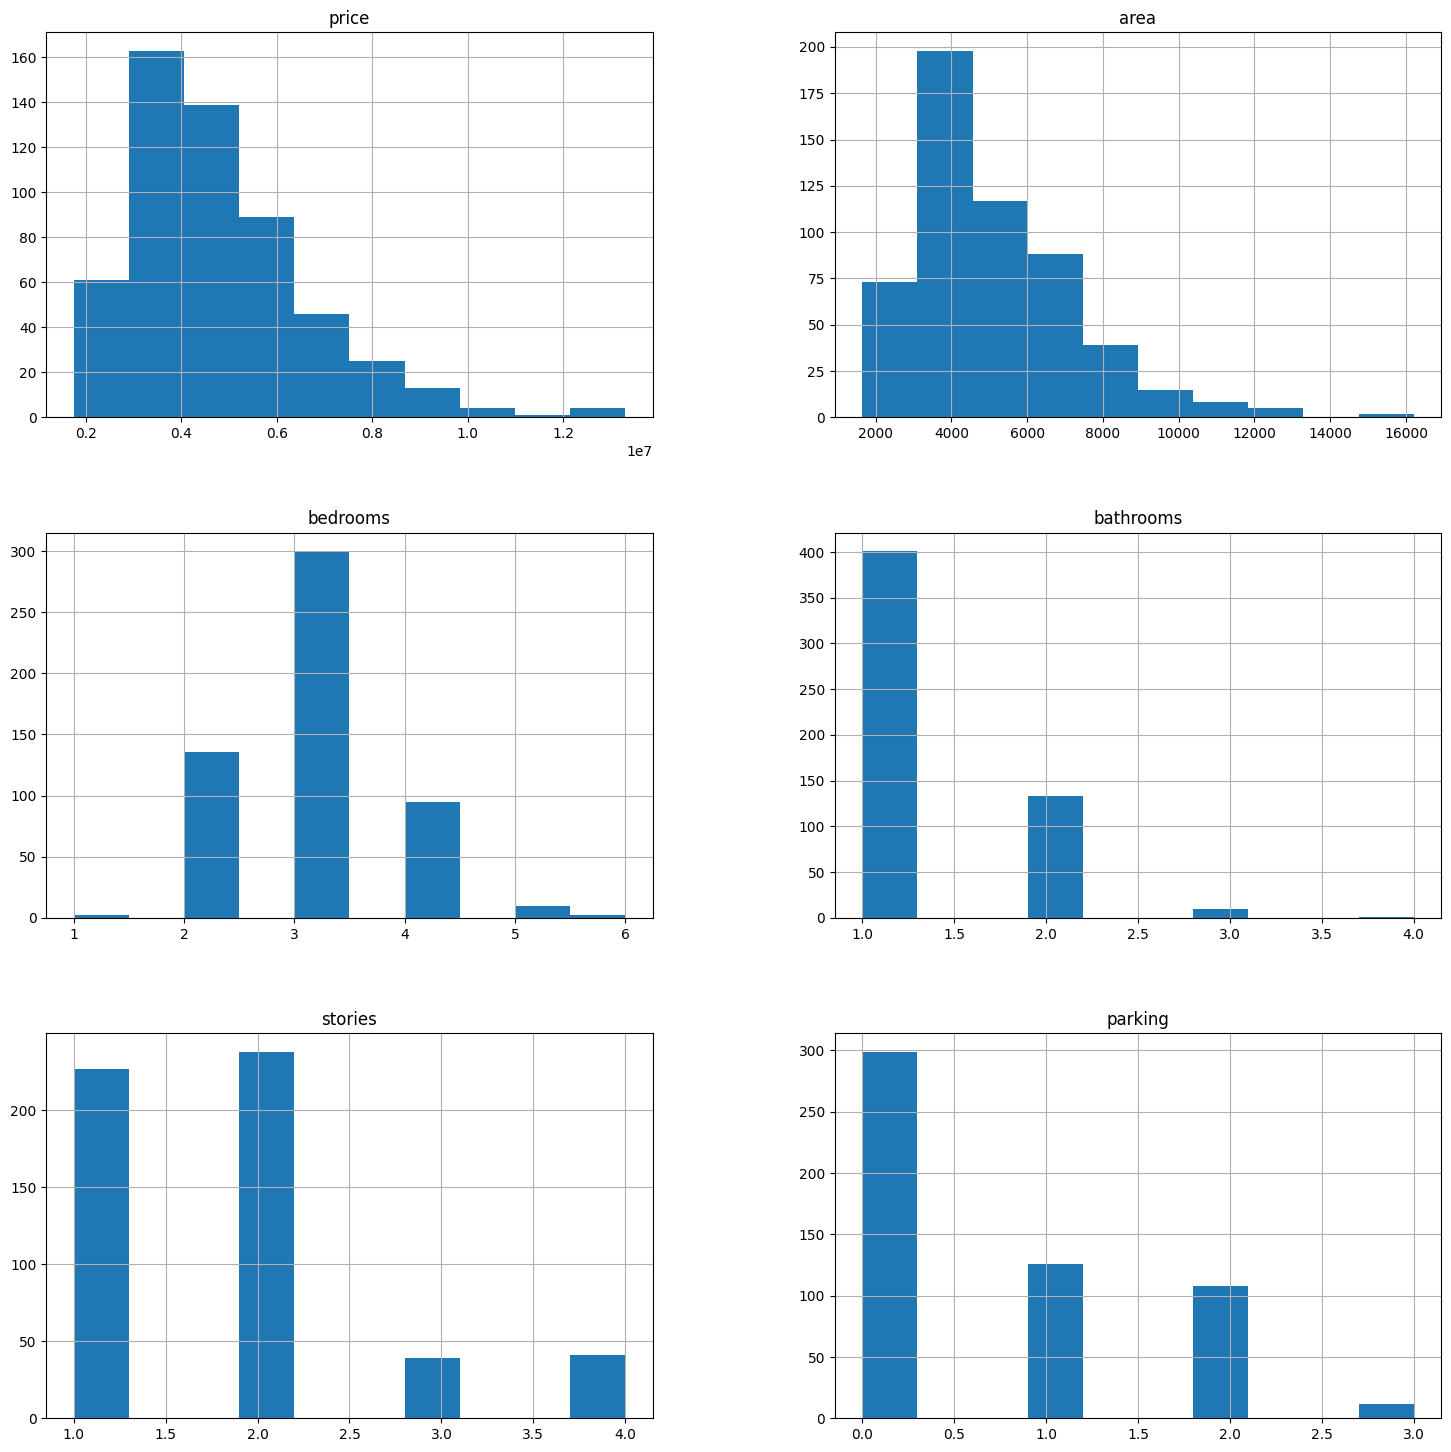

In [11]:
# Graph histogram of numerical data
house_df.hist(figsize=(18,18))
plt.show()

In [12]:
# Check data skewness
house_df.skew(numeric_only=True)

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

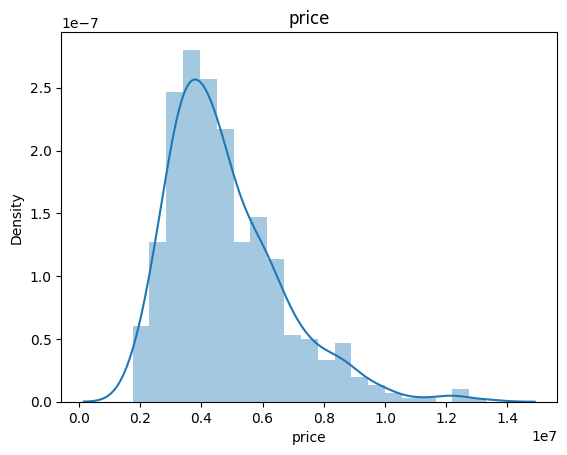

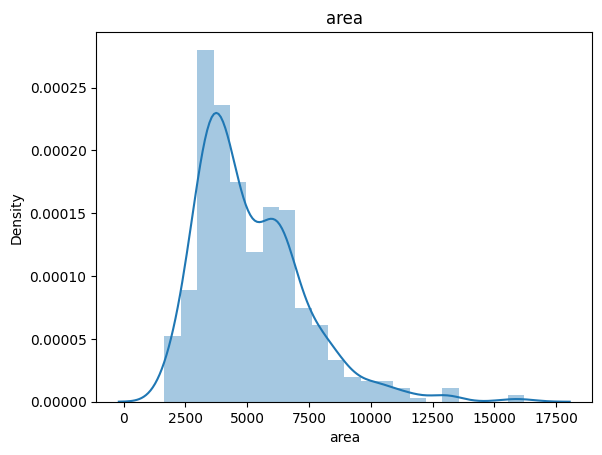

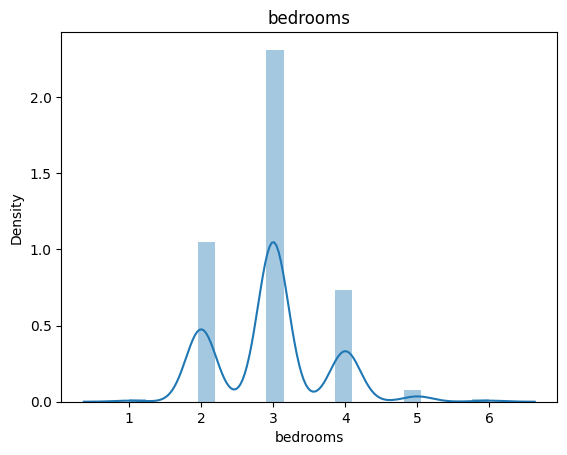

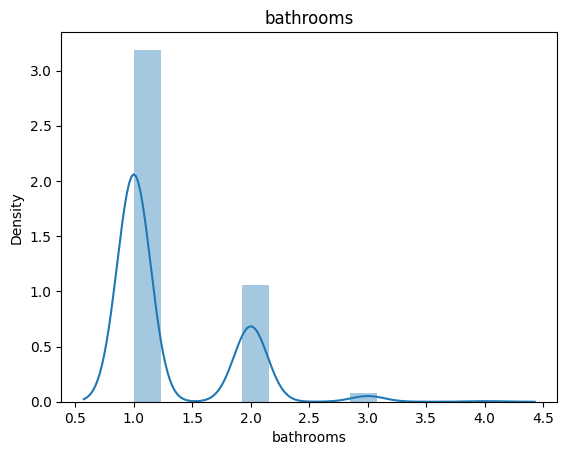

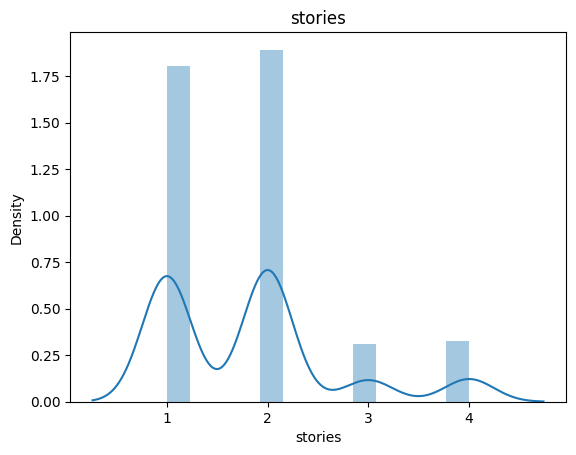

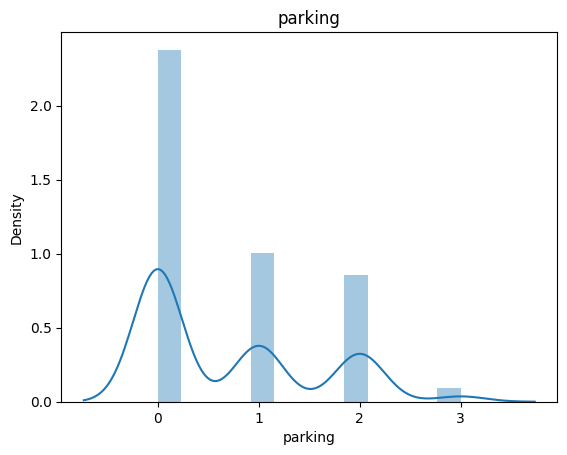

In [13]:
# Graph Distplot of numerical data
for i in num:
    sns.distplot(house_df[i])
    plt.title(i)
    plt.show()

### *Observation:*

- 1. Our numerical data is not normal distributed form.
- 2. Convert data into bell-curve/normal form.

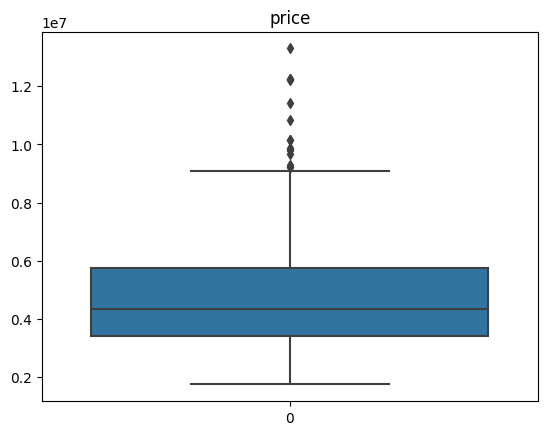

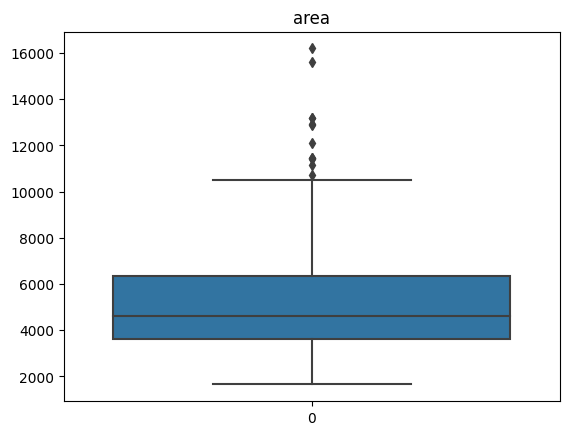

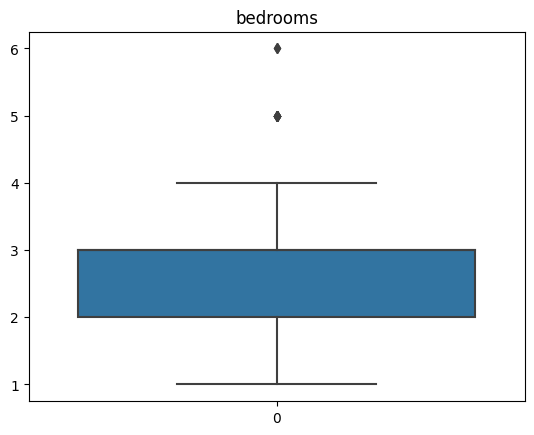

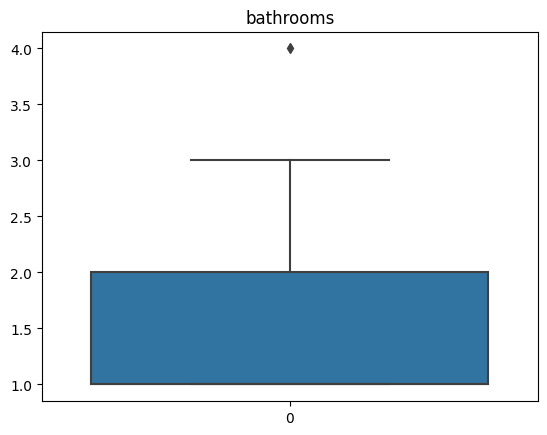

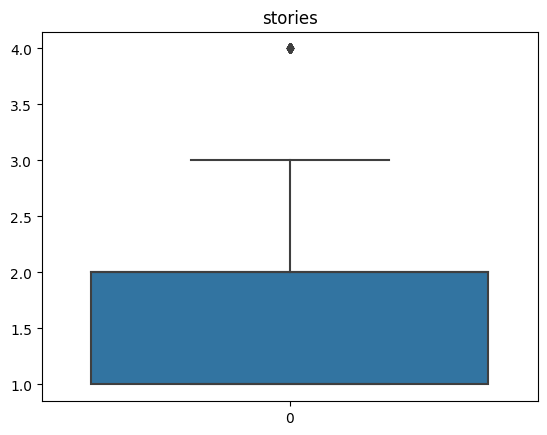

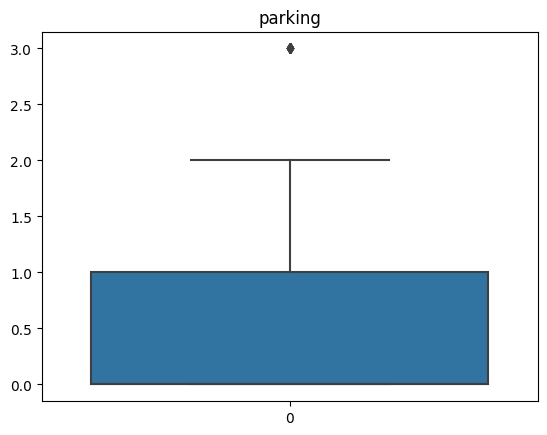

In [14]:
# Graph Boxplot of numerical data
for i in num:
    sns.boxplot(house_df[i])
    plt.title(i)
    plt.show()

### *Observation:*

- 1. Price, area and bedrooms have outliers.
- 2. Deal with outliers.

### ii. Bivariant & Multivariant Analysis on numerical-to-numerical data

In [15]:
# Top 5 rows of data
house_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


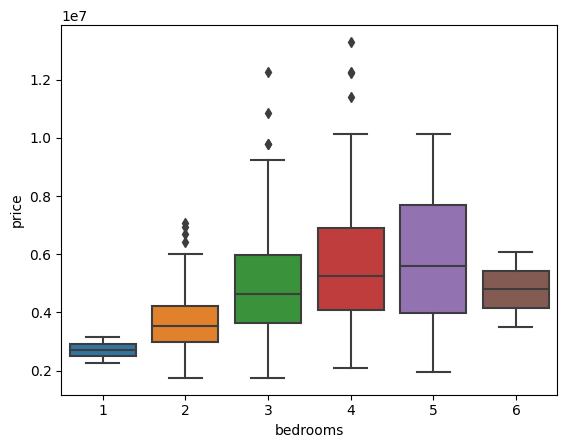

In [16]:
# Graph Boxplot of numerical-to-numerical data see the relationship b/w 'bedrooms' and 'price'
sns.boxplot(data= house_df, x='bedrooms', y='price')
plt.show()

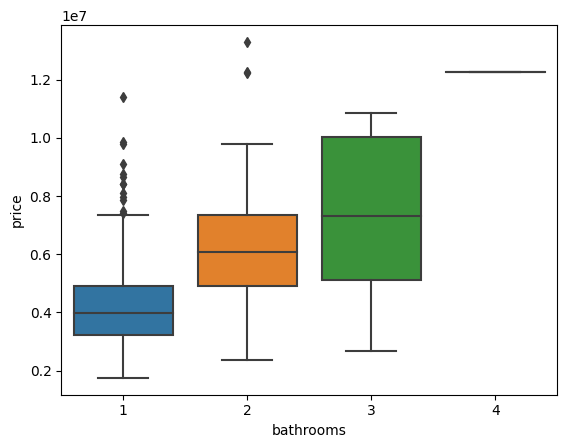

In [17]:
# Graph Boxplot of numerical-to-numerical data see the relationship b/w 'bathrooms' and 'price'
sns.boxplot(data= house_df, x='bathrooms', y='price')
plt.show()

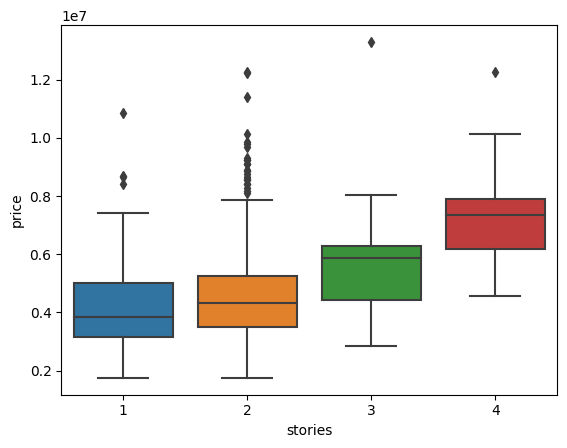

In [18]:
# Graph Boxplot of numerical-to-numerical data see the relationship b/w 'stories' and 'price'
sns.boxplot(data= house_df, x='stories', y='price')
plt.show()

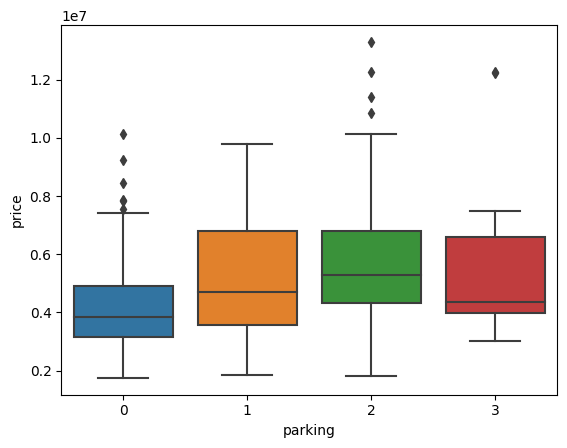

In [19]:
# Graph Boxplot of numerical-to-numerical data see the relationship b/w 'parking' and 'price'
sns.boxplot(data= house_df, x='parking', y='price')
plt.show()

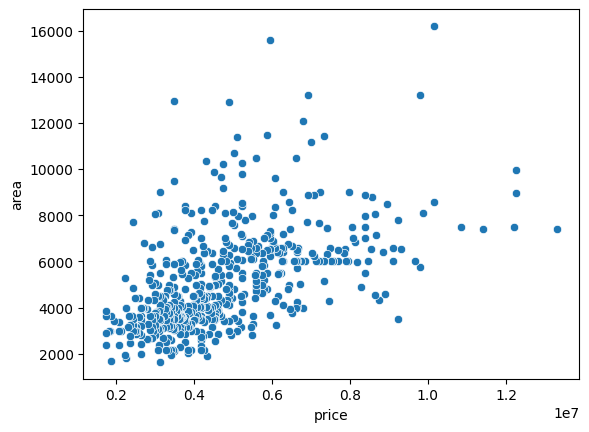

In [20]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship b/w 'area' and 'price'
sns.scatterplot(data= house_df, x='price', y='area')
plt.show()

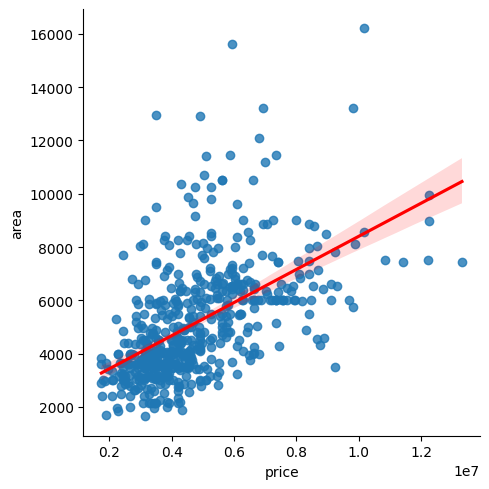

In [21]:
# Graph Scatterplot of numerical-to-numerical data and see the relationship b/w 'area' and 'price'
sns.lmplot(data= house_df, x='price', y='area', line_kws={'color': 'red'})
plt.show()

### *Observation:*

- 1. price and area is continues data.
- 2. The best fit line pass through the points.

### i. Univariant Analysis on categorical data

In [22]:
cat

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

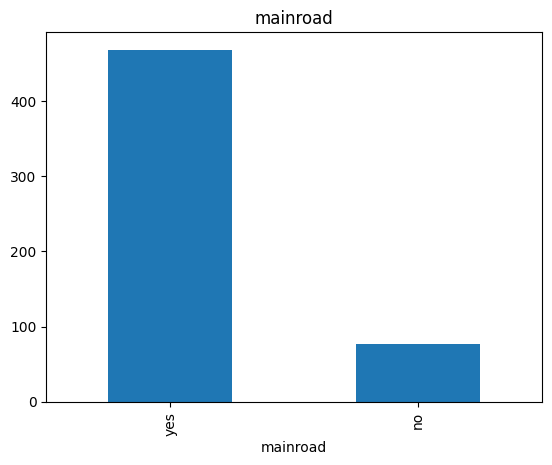

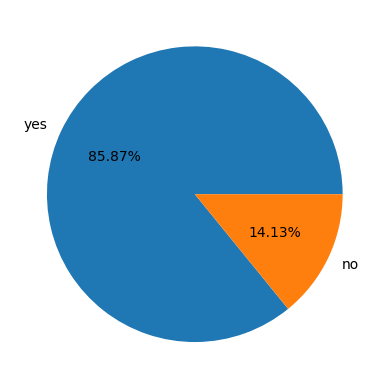

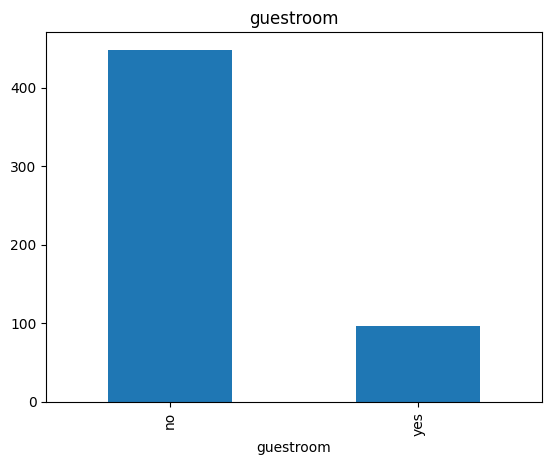

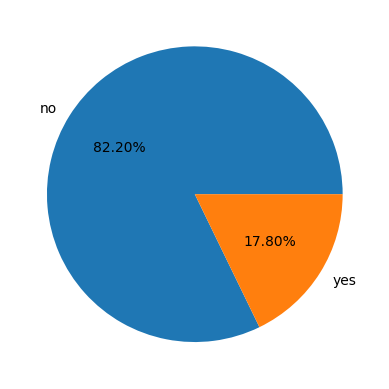

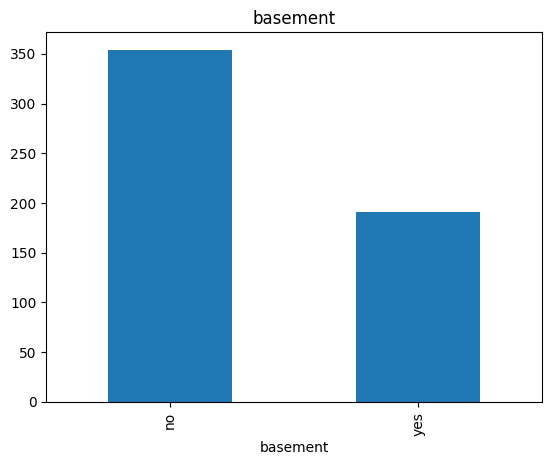

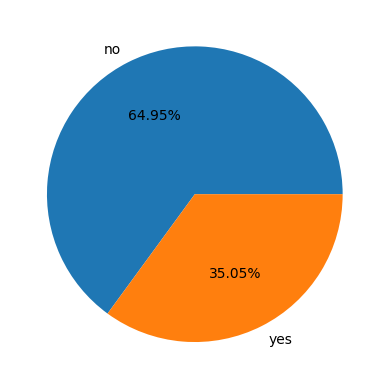

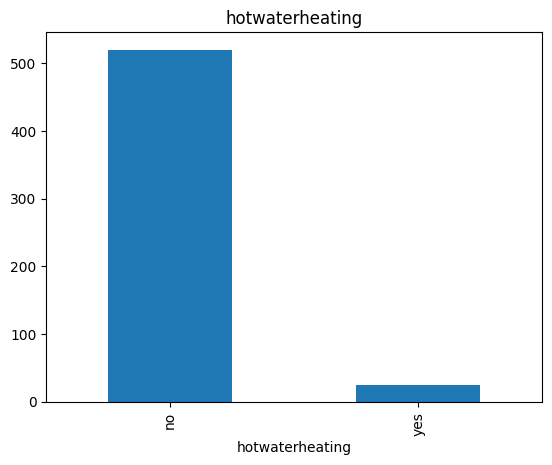

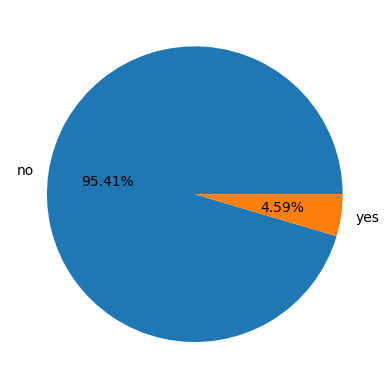

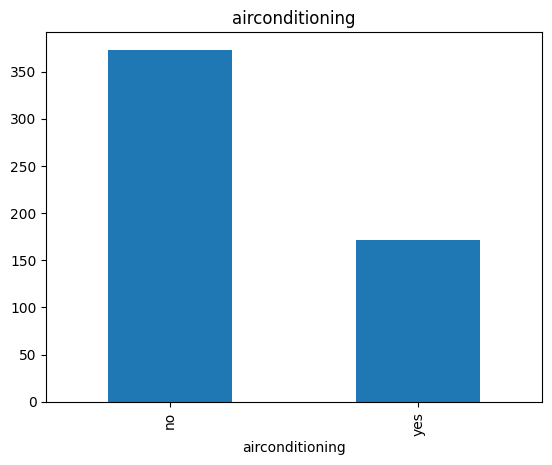

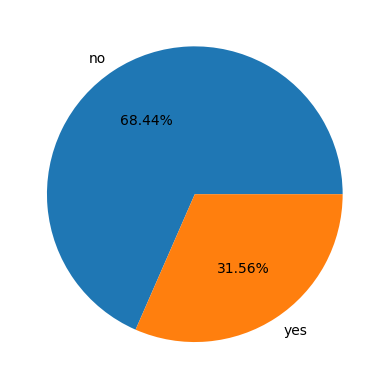

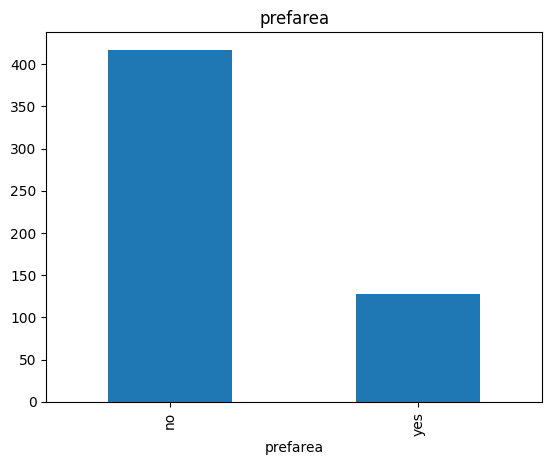

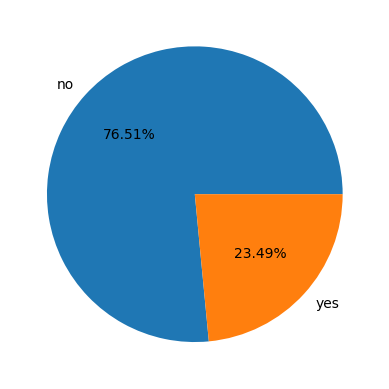

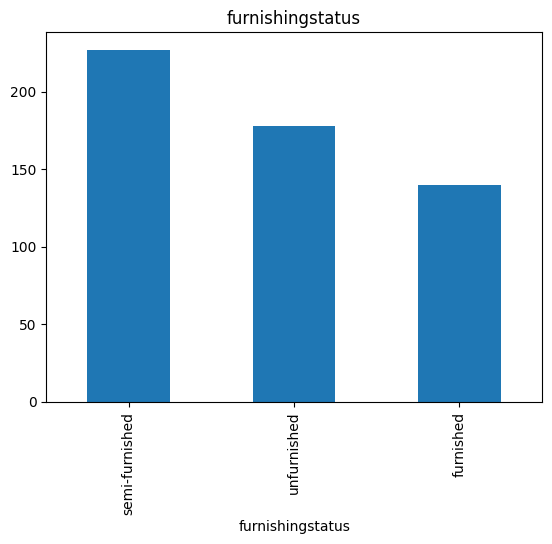

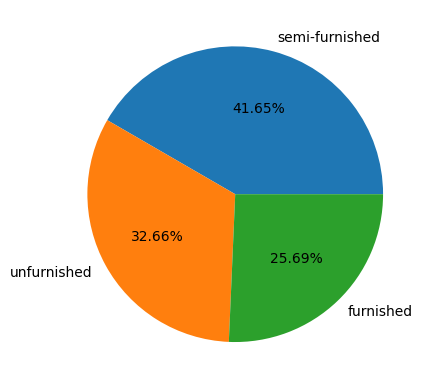

In [23]:
# Graph barplot of on cat cols
for i in cat:
    house_df[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()
    # Graph pie chart
    lab = house_df[i].value_counts().index
    plt.pie(house_df[i].value_counts(), labels= lab, autopct='%.2f%%')
    plt.show()

### *Observation:*

- 1. 'mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', and 'prefarea' are imbalanced data.

### ii. Bivariant & Multivariant Analysis on numerical-to-categorical data

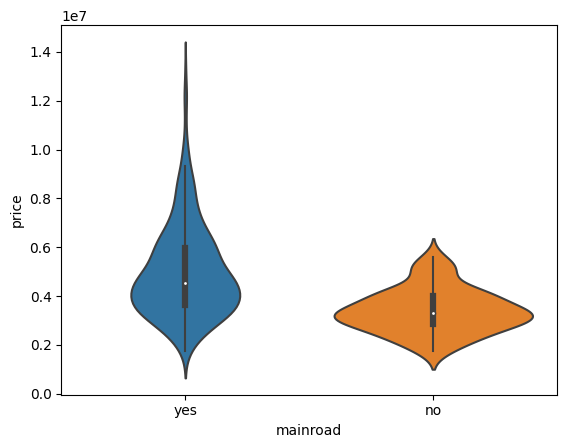

In [24]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'mainroad' and 'price'
sns.violinplot(data= house_df, x='mainroad', y='price')
plt.show()

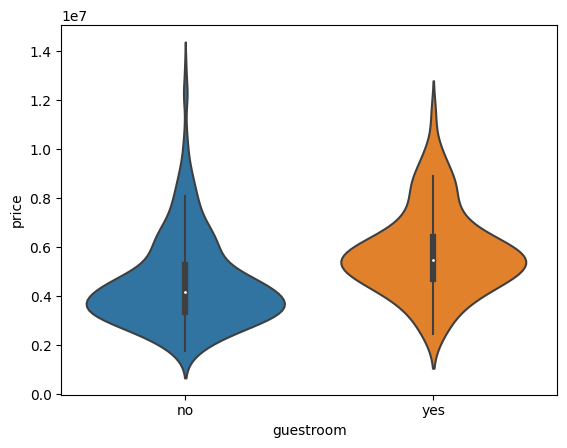

In [25]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'guestroom' and 'price'
sns.violinplot(data= house_df, x='guestroom', y='price')
plt.show()

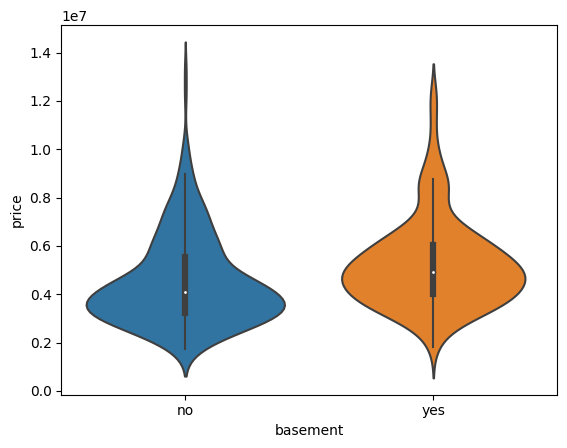

In [26]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'basement' and 'price'
sns.violinplot(data= house_df, x='basement', y='price')
plt.show()

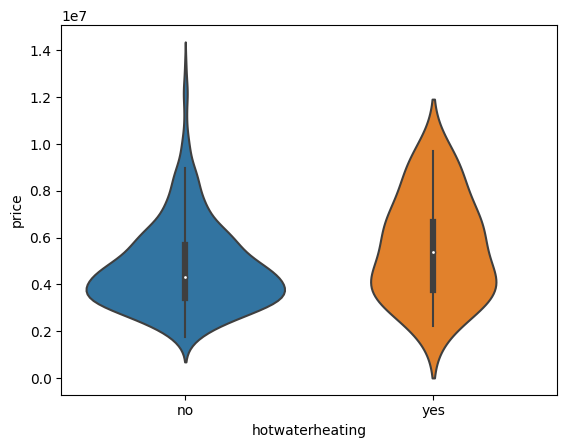

In [27]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'hotwaterheating' and 'price'
sns.violinplot(data= house_df, x='hotwaterheating', y='price')
plt.show()

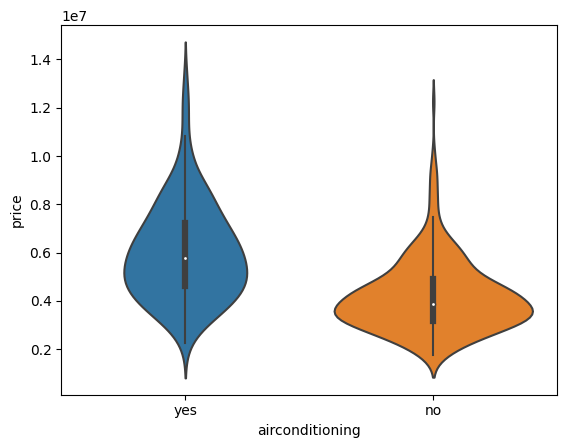

In [28]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'airconditioning' and 'price'
sns.violinplot(data= house_df, x='airconditioning', y='price')
plt.show()

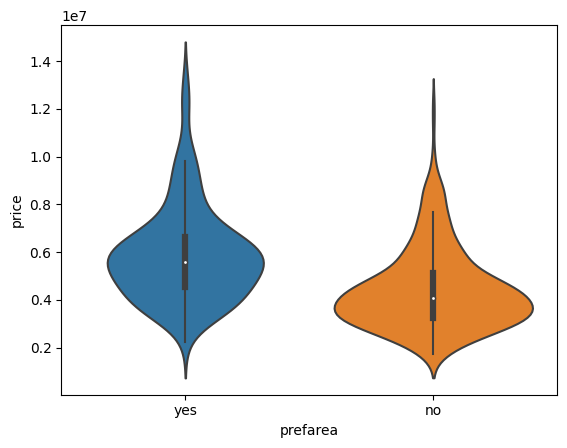

In [29]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'prefarea' and 'price'
sns.violinplot(data= house_df, x='prefarea', y='price')
plt.show()

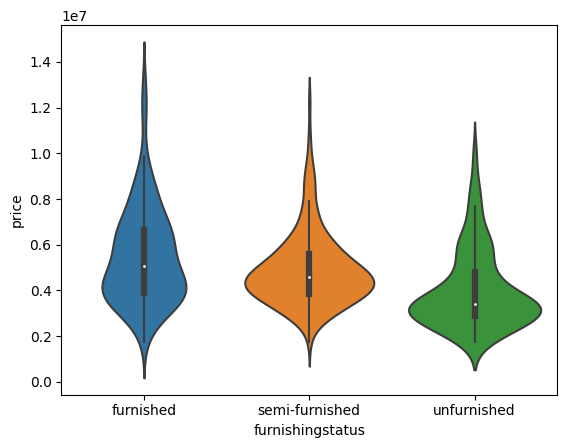

In [30]:
# Graph violinplot of numerical-to-categorical data see the relationship b/w 'furnishingstatus' and 'price'
sns.violinplot(data= house_df, x='furnishingstatus', y='price')
plt.show()

### *Observation:*

- 1. See the distribution of numerical-to-categorical data.

## 3. Data Preprocessing

In [31]:
# Last 5 rows of data
house_df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [32]:
# Convert categorical data into numerical form using onehotencoding technique
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', dtype='int64', handle_unknown='ignore', sparse_output=False)
ohe.set_output(transform='pandas')

OneHotEncoder(drop='first', dtype='int64', handle_unknown='ignore',
              sparse_output=False)

In [33]:
# Cat cols
cat

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [34]:
# Convert categorical columns into numerical form
house_structure = ohe.fit_transform(house_df[cat])

In [35]:
# Drop ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] columns
house_df.drop(columns= ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], axis=1, inplace=True)

In [36]:
# Concatenate all cols
house_df = pd.concat([house_df, house_structure], axis=1)

In [37]:
house_df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [38]:
# Shape of data
house_df.shape

(545, 14)

In [39]:
# Correlation between the features
house_df.corr(numeric_only=True)['price'].sort_values(ascending=False)*100

price                              100.000000
area                                53.599735
bathrooms                           51.754534
airconditioning_yes                 45.295408
stories                             42.071237
parking                             38.439365
bedrooms                            36.649403
prefarea_yes                        32.977705
mainroad_yes                        29.689849
guestroom_yes                       25.551729
basement_yes                        18.705660
hotwaterheating_yes                  9.307284
furnishingstatus_semi-furnished      6.365634
furnishingstatus_unfurnished       -28.058736
Name: price, dtype: float64

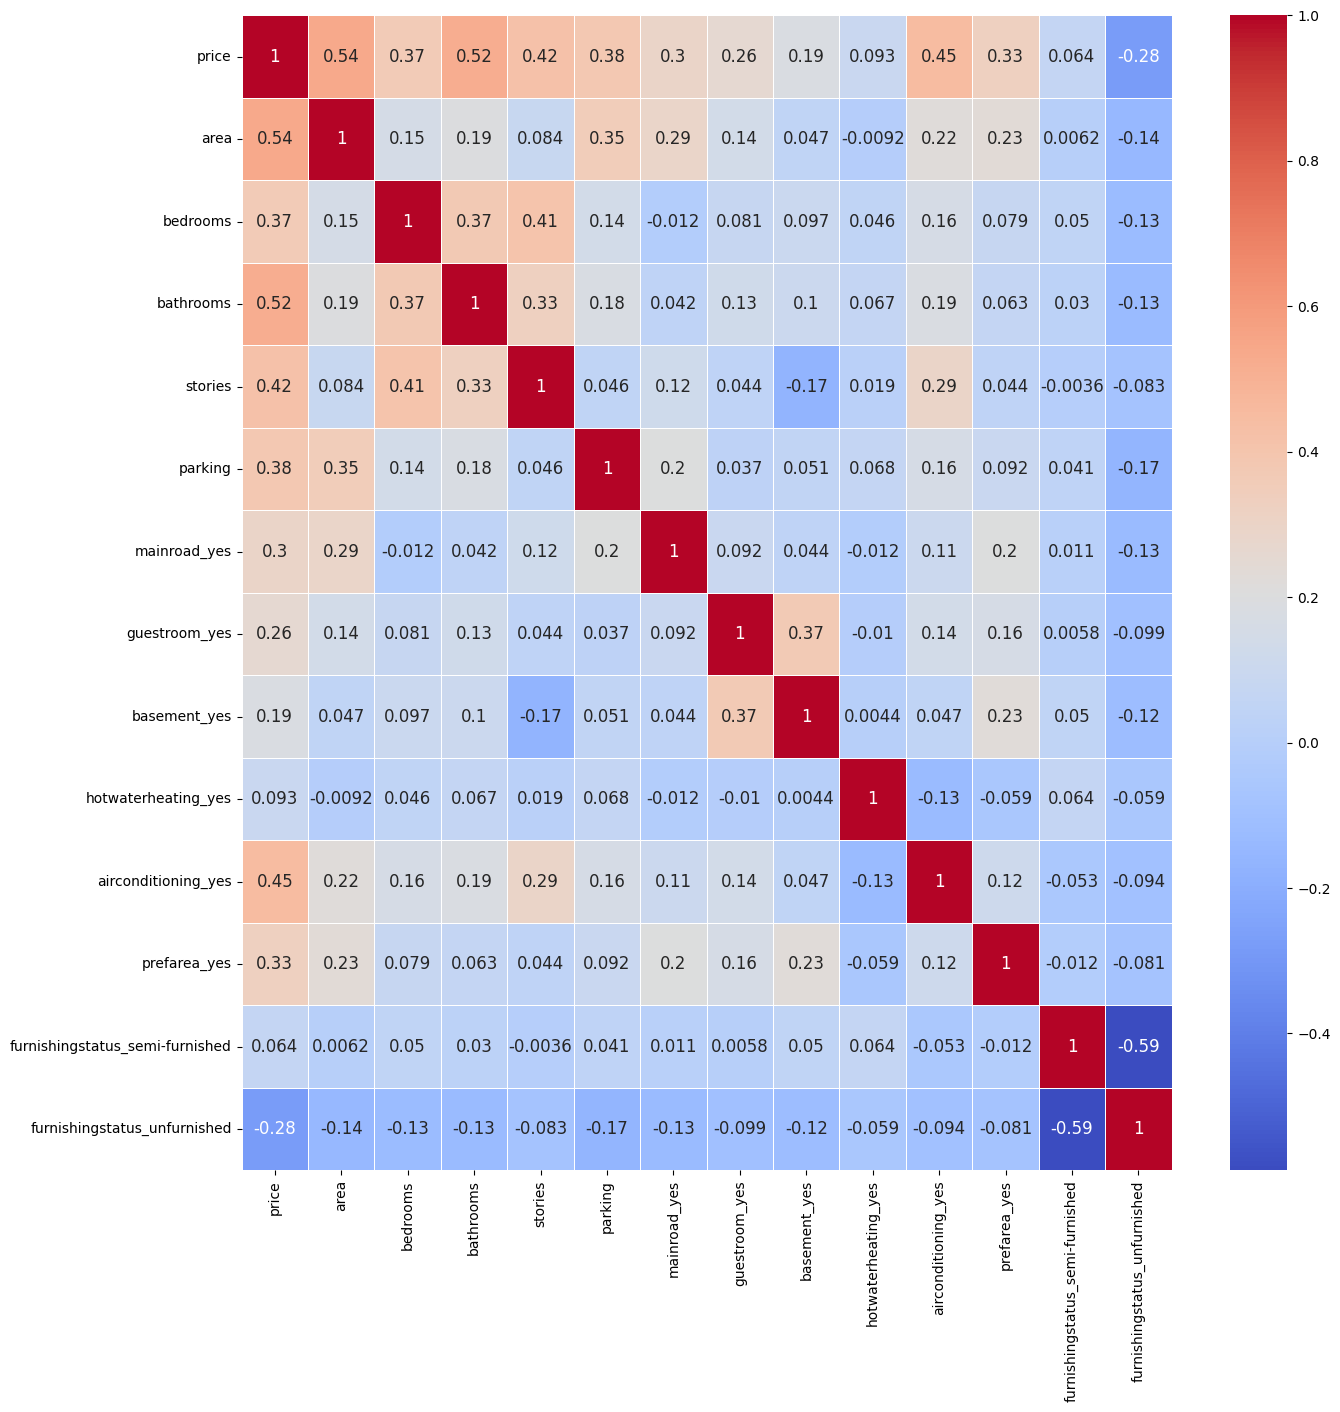

In [40]:
# Graph heatmap of correlation
plt.figure(figsize=(15,15))
sns.heatmap(house_df.corr(numeric_only=True), cmap='coolwarm', annot=True, annot_kws={'size': 12}, linewidths= .7)
plt.show()

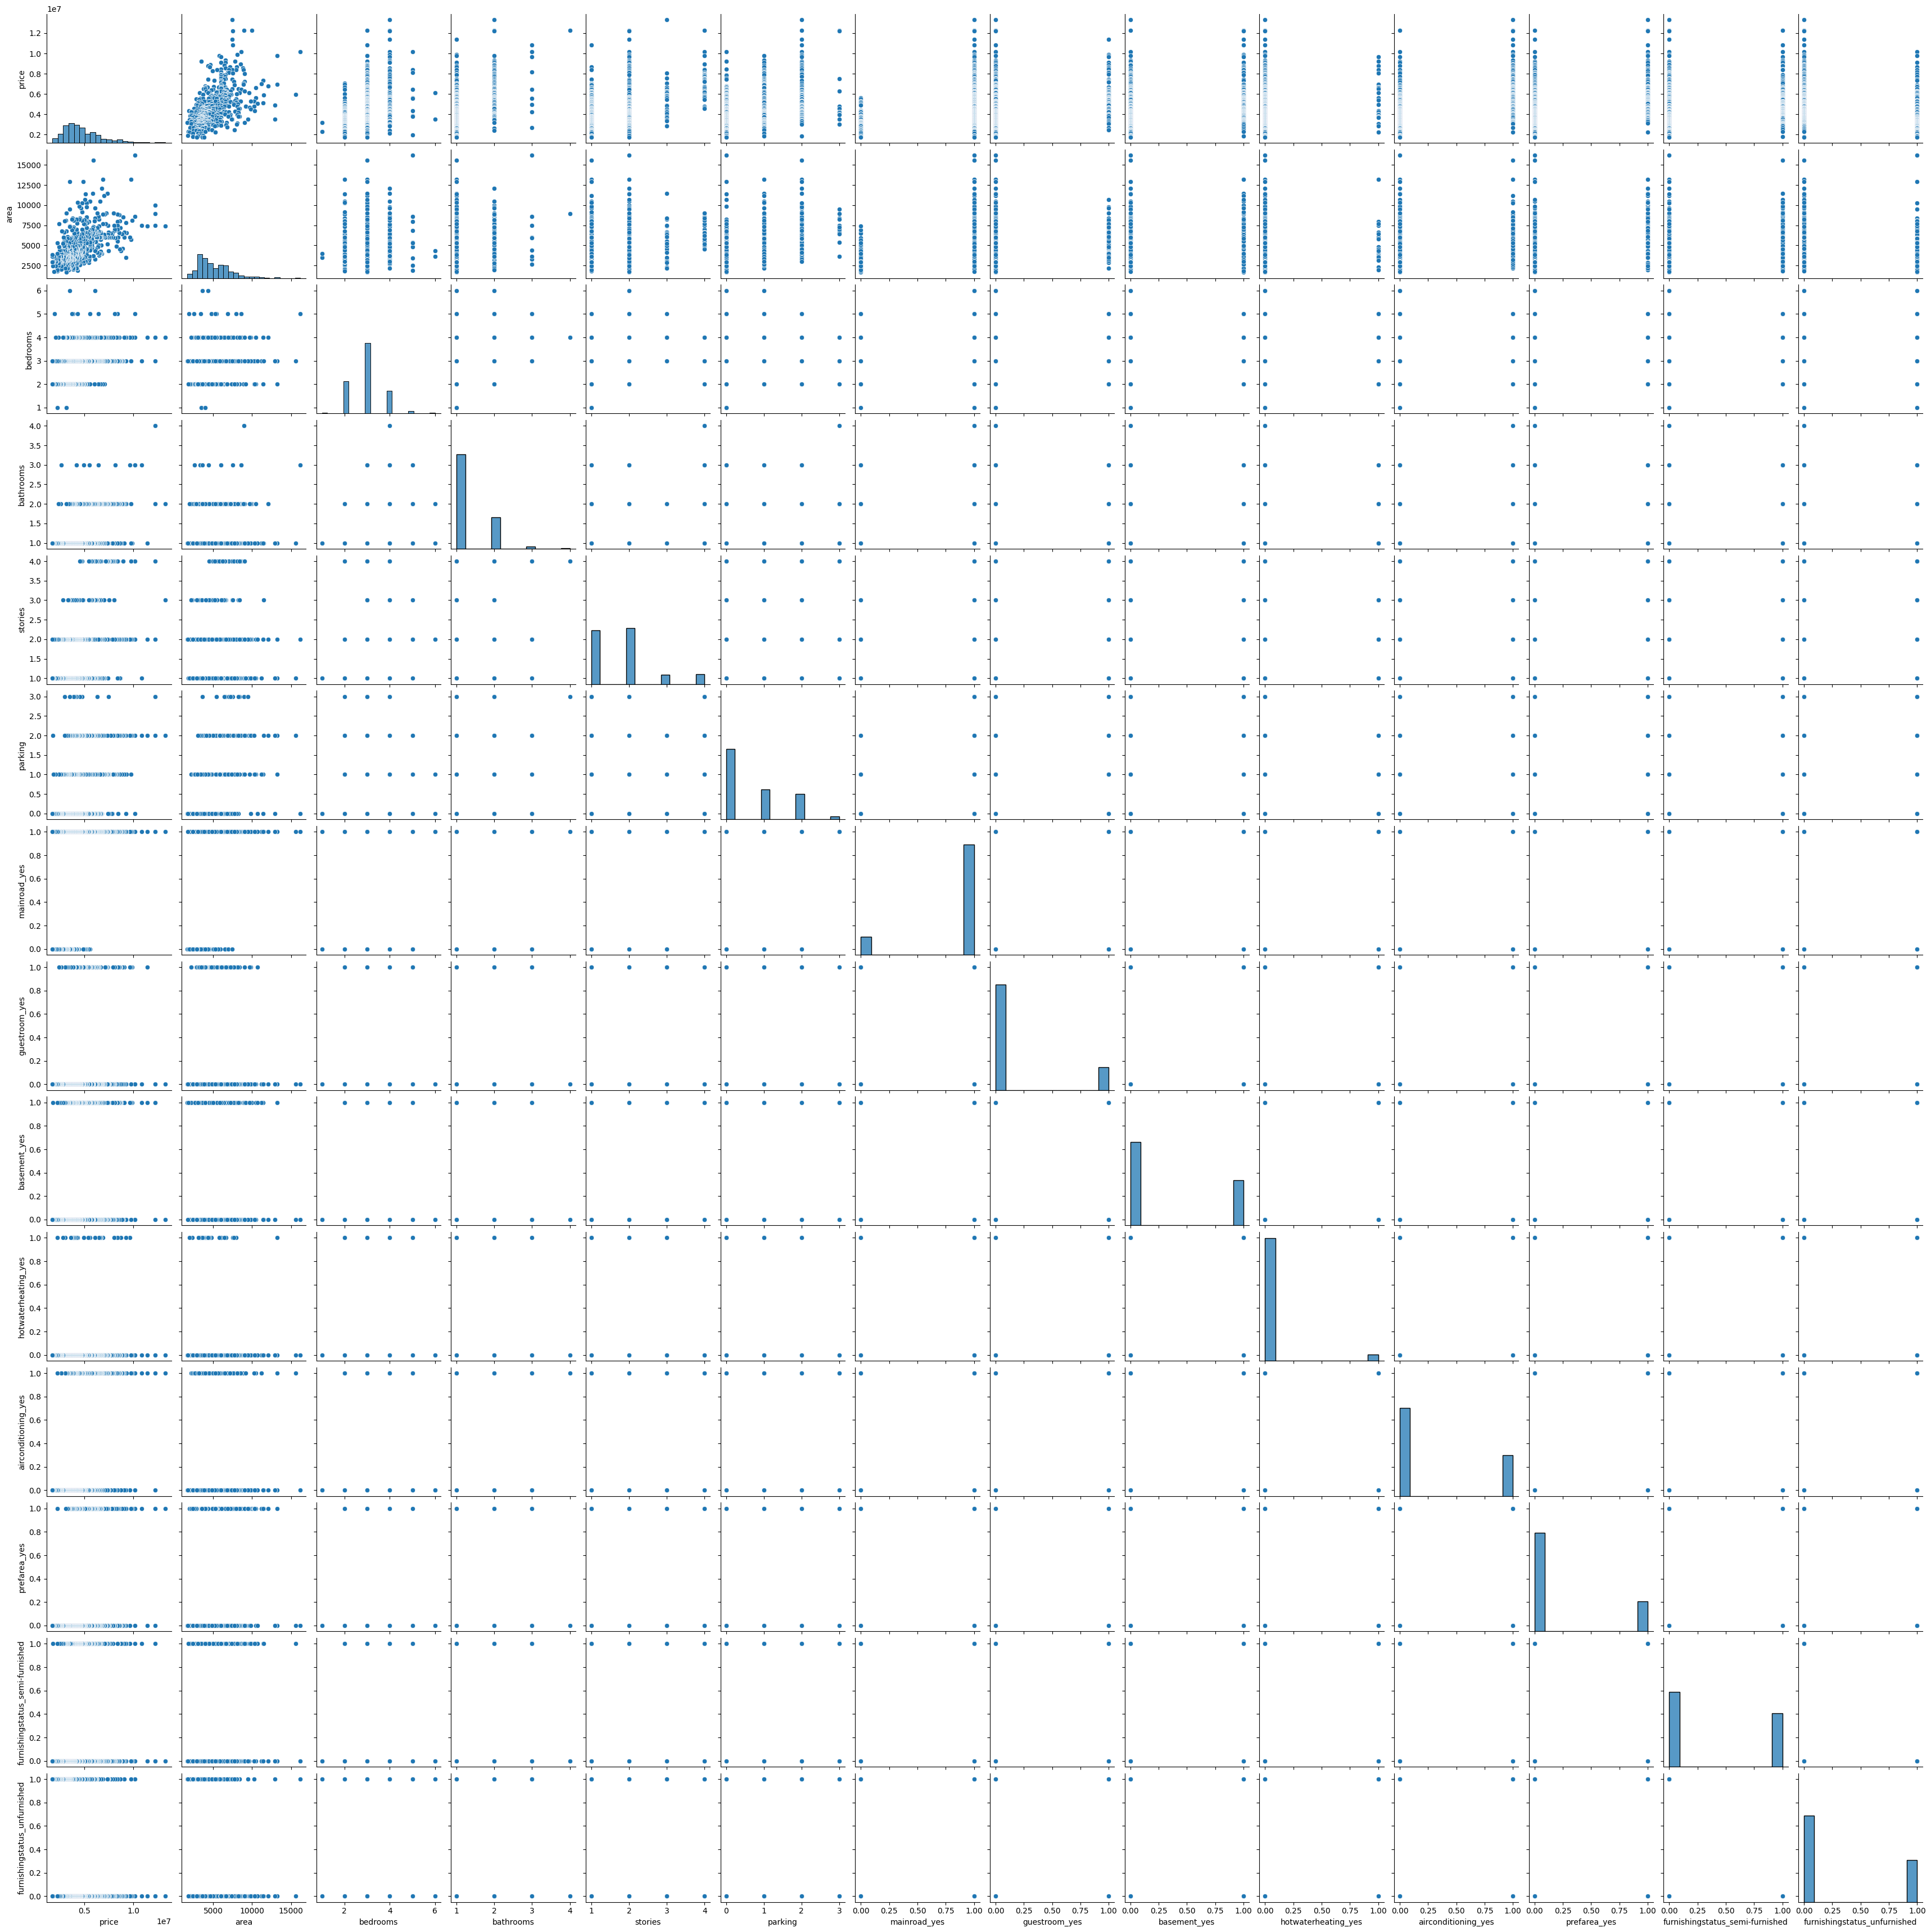

In [41]:
# Graph pairplot 
sns.pairplot(house_df)
plt.show()

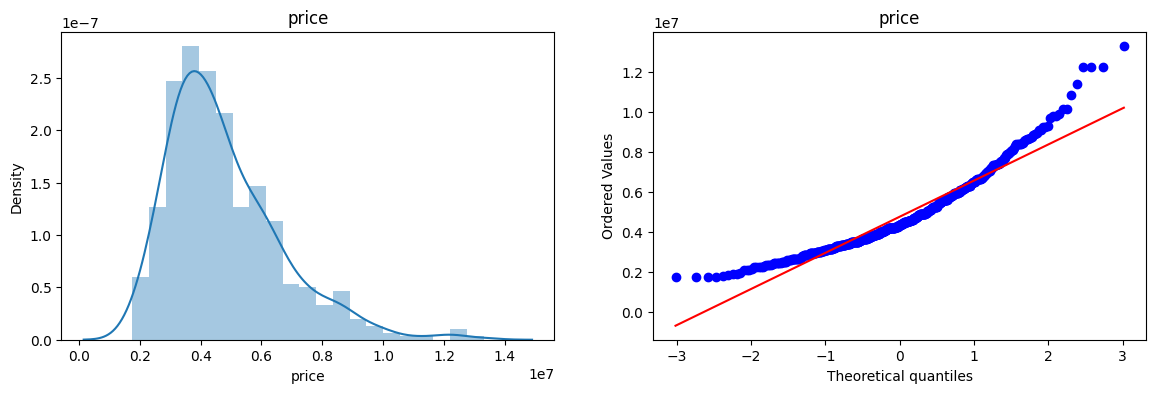

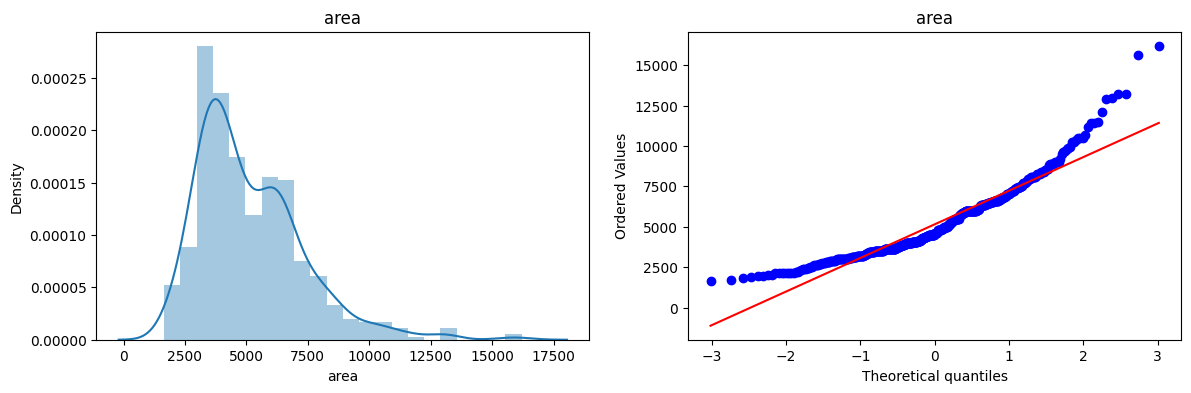

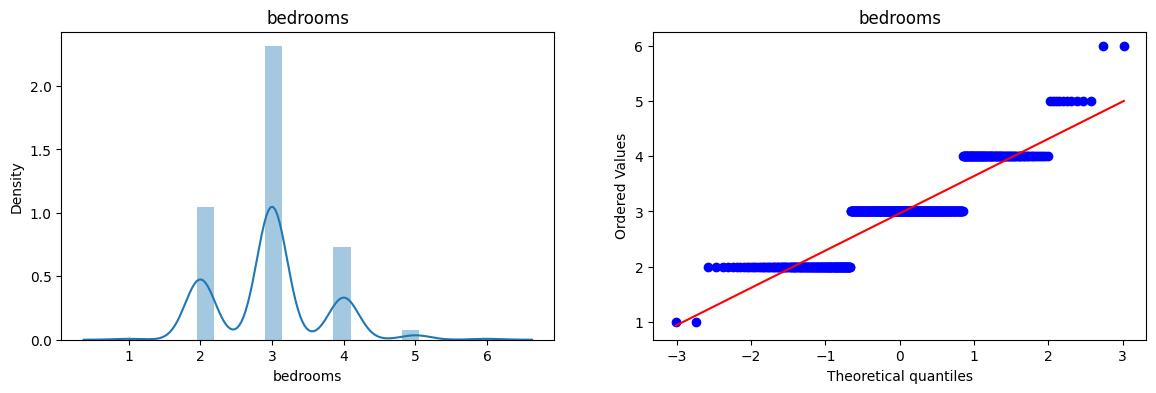

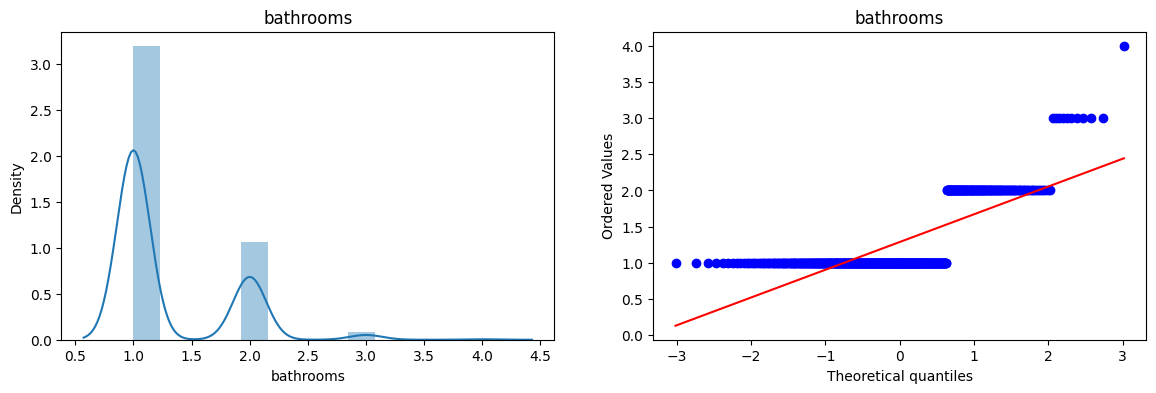

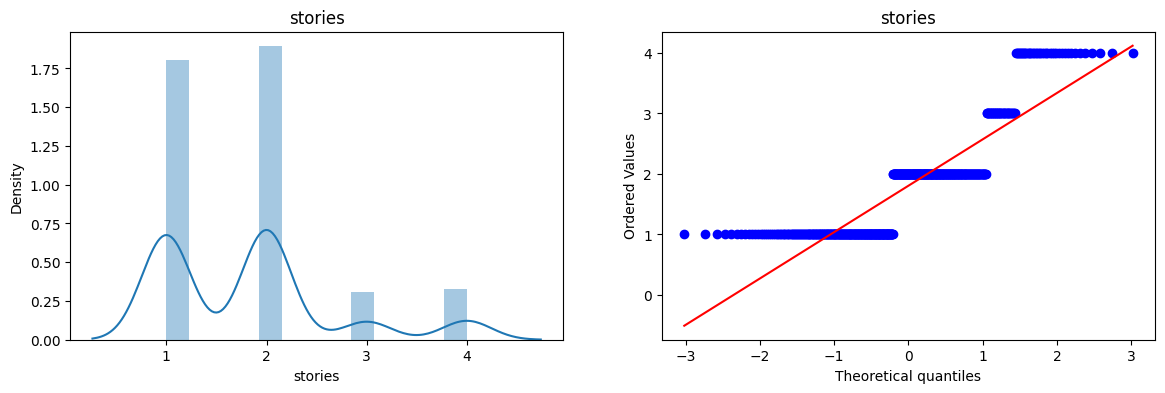

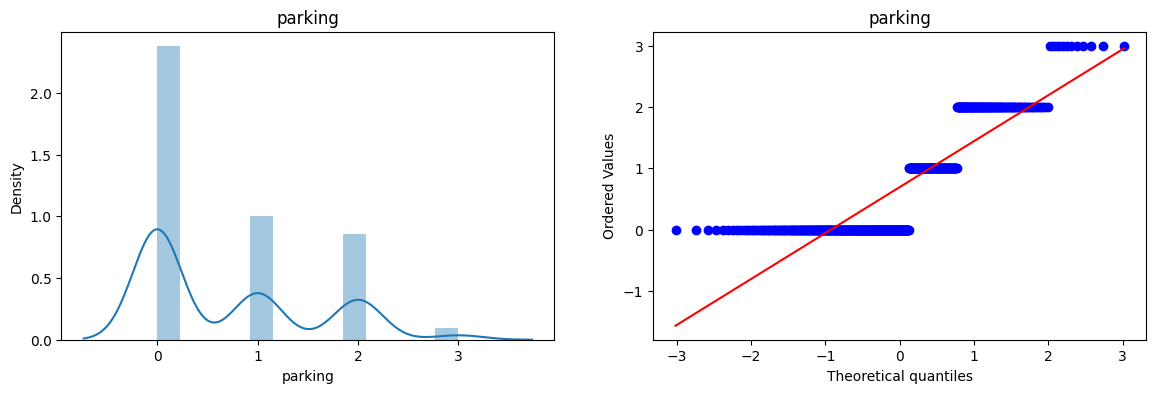

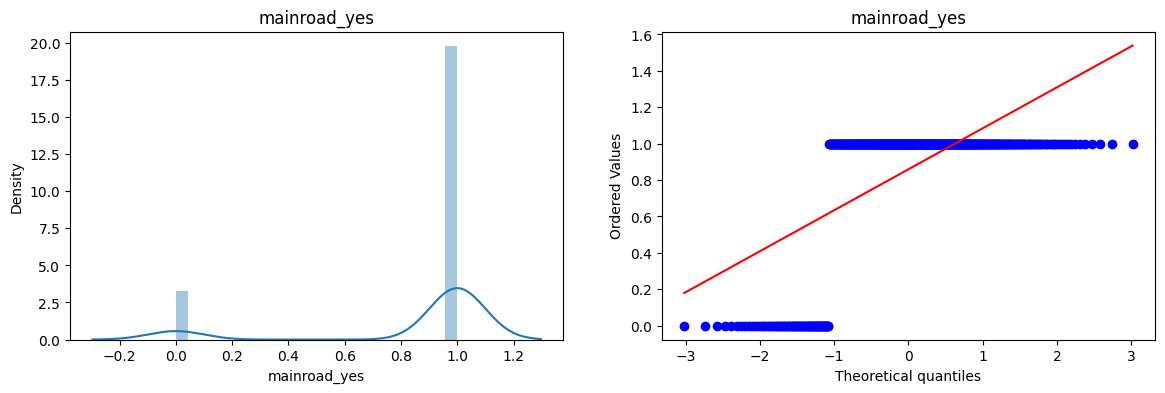

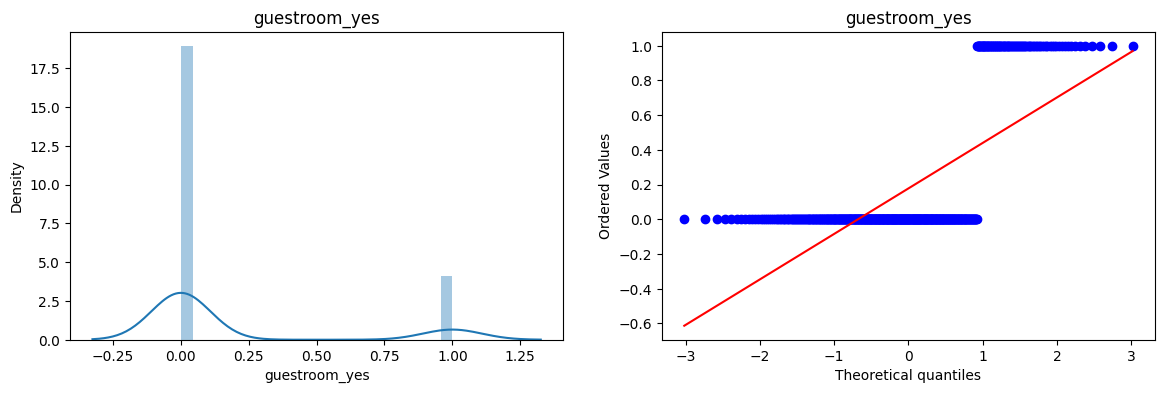

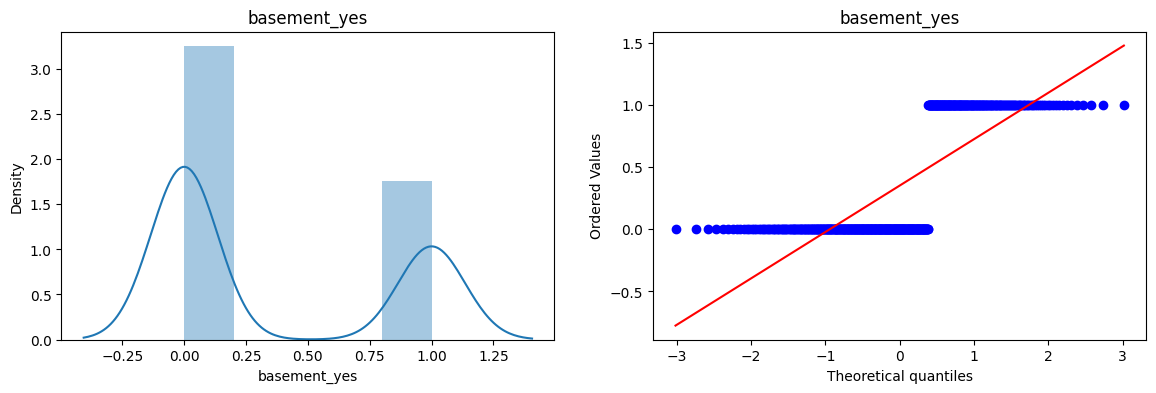

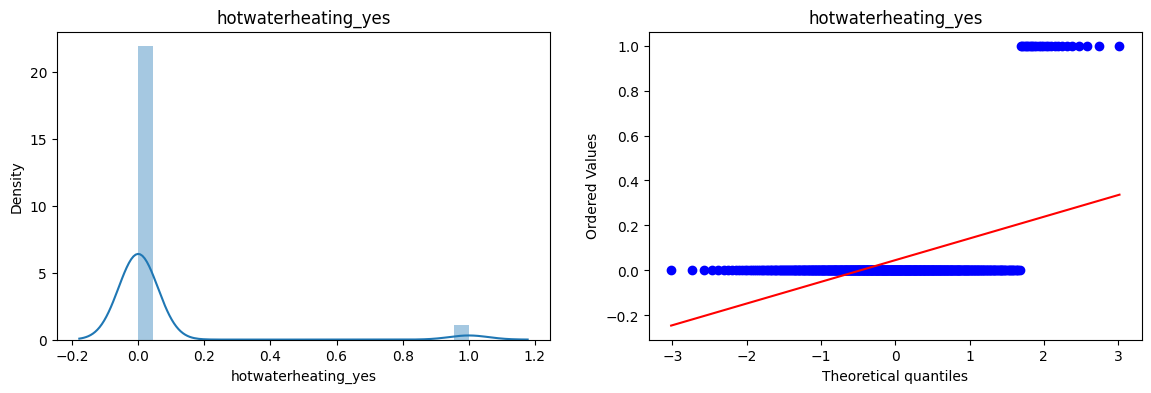

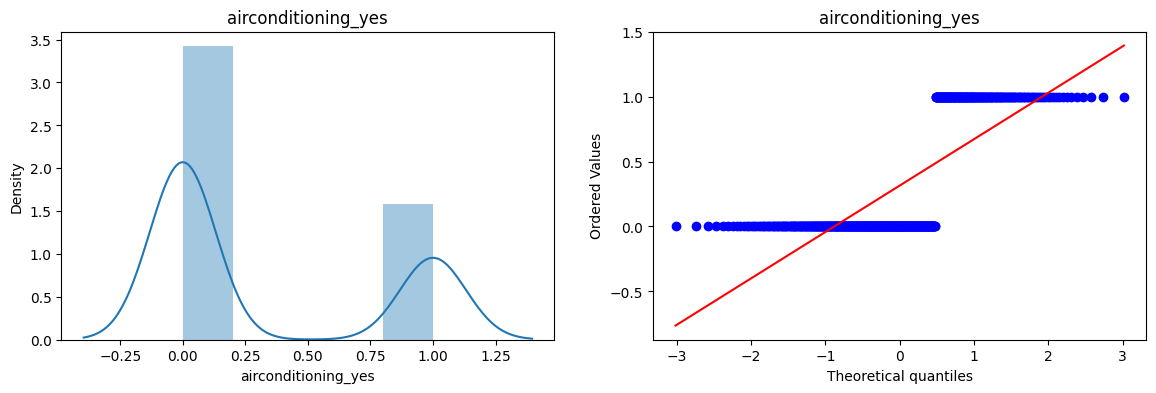

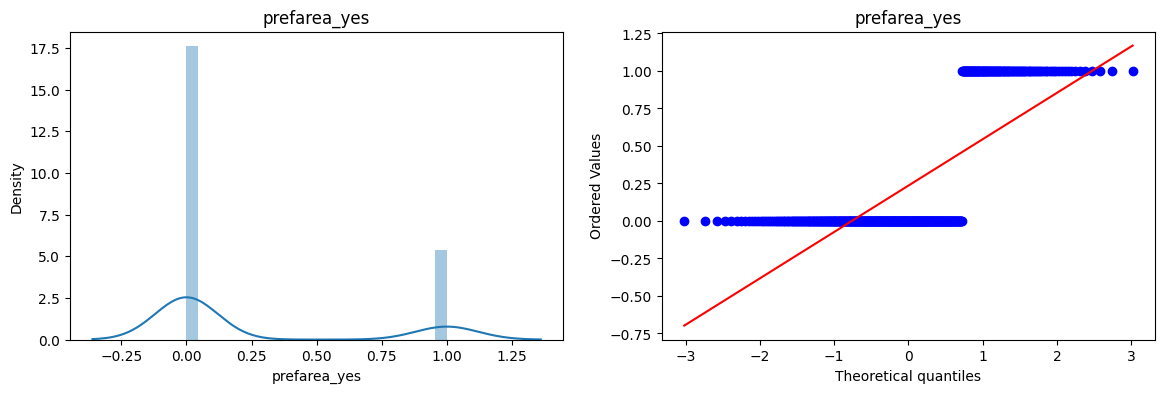

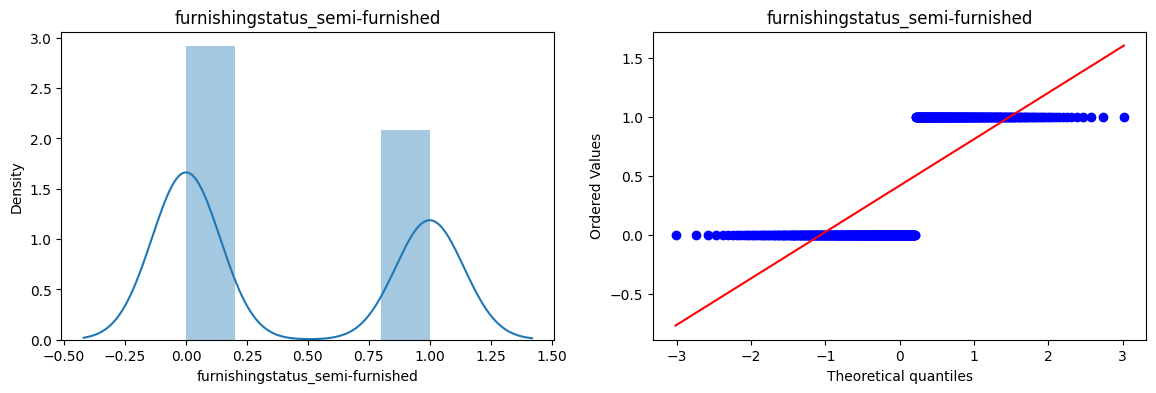

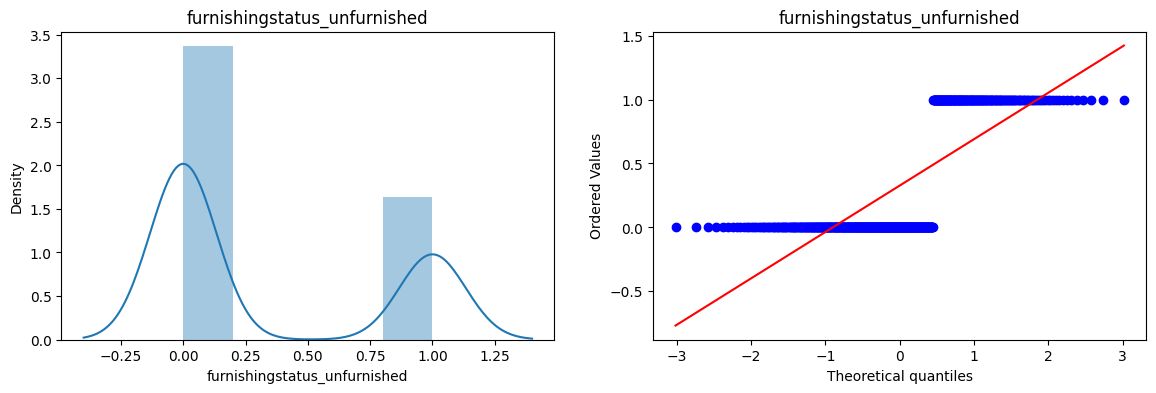

In [42]:
# Plotting the distplots without any transformation
for col in house_df.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(house_df[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(house_df[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [43]:
# Split data into featue X and y for feature selection
x = house_df.iloc[:,1:]
y = house_df.iloc[:,0:1]

In [44]:
# Apply power transform featurewise to make data more Gaussian-like.
# Transform features using quantiles information.
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
qwt = PowerTransformer(method='box-cox')
qwt.set_output(transform='pandas')

PowerTransformer(method='box-cox')

In [45]:
# Transform independent features
x_qwt = qwt.fit_transform(x+0.0000001)

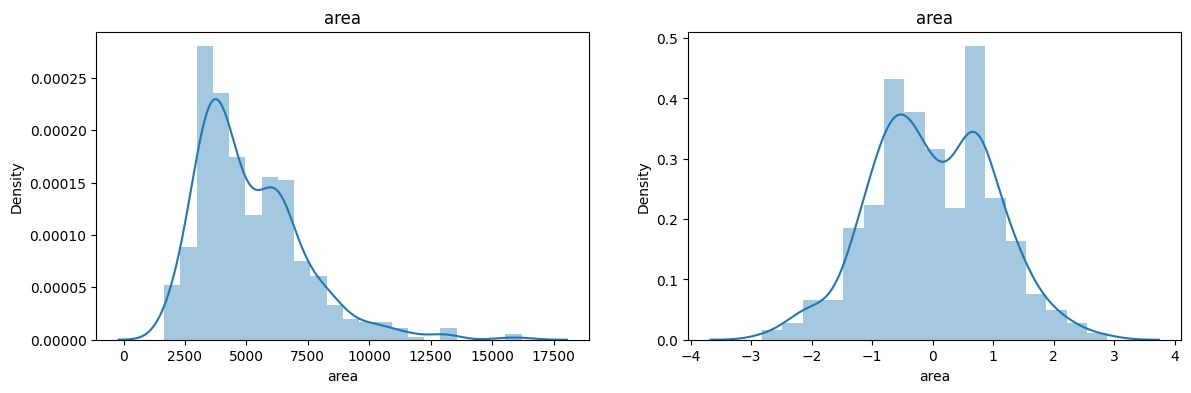

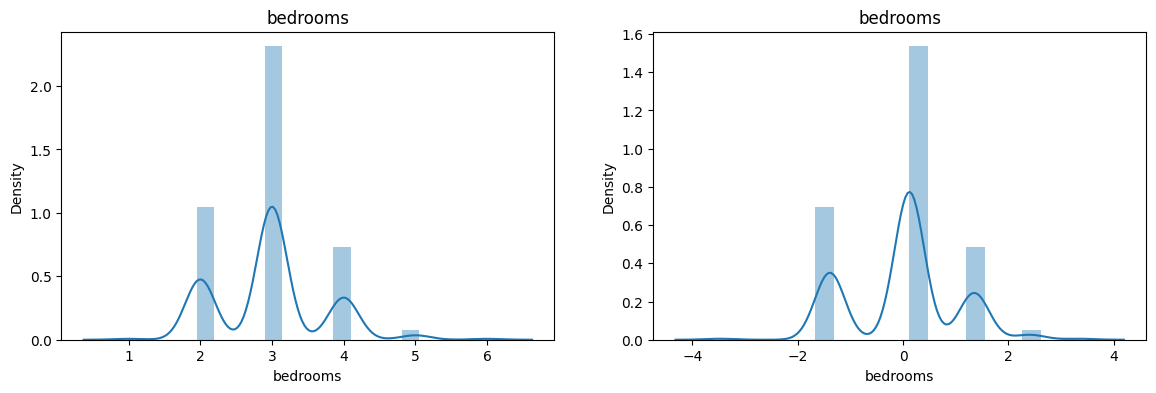

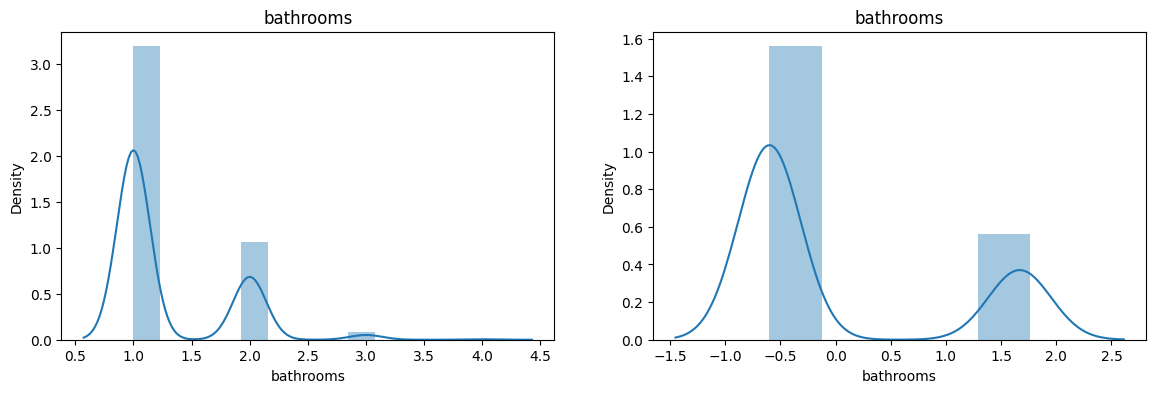

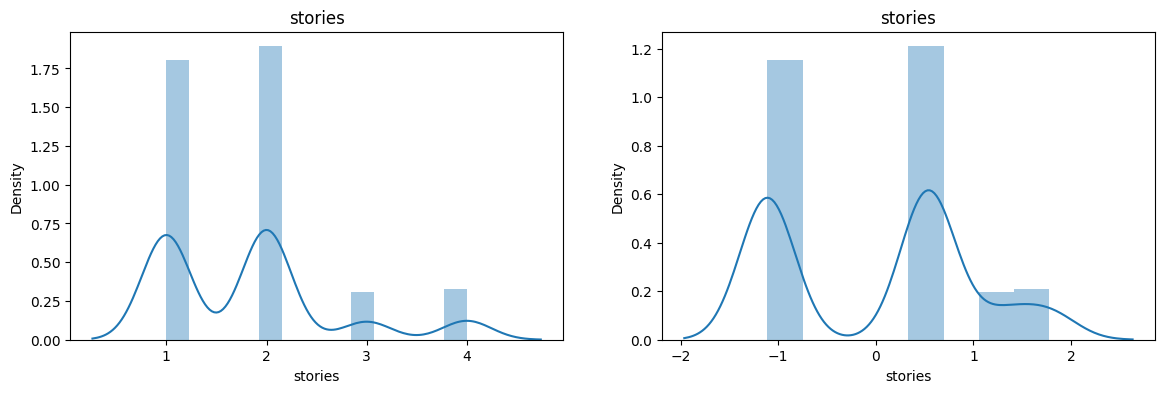

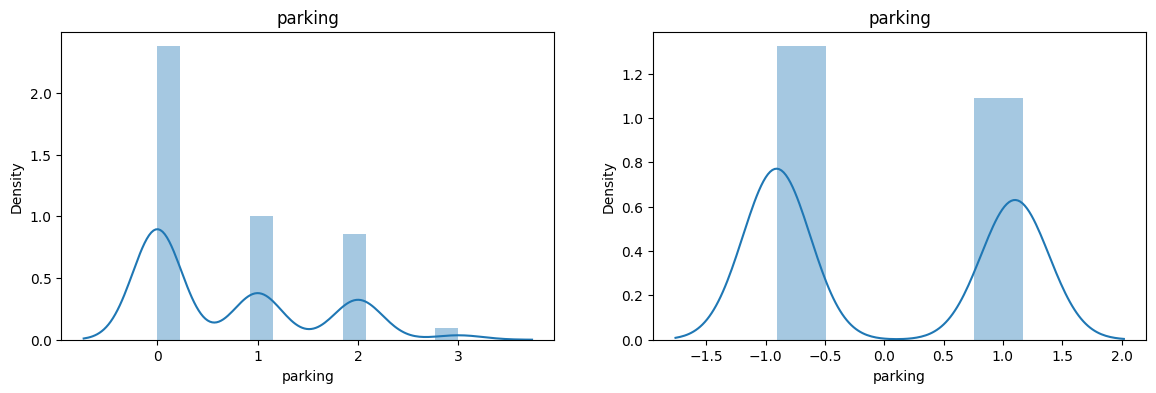

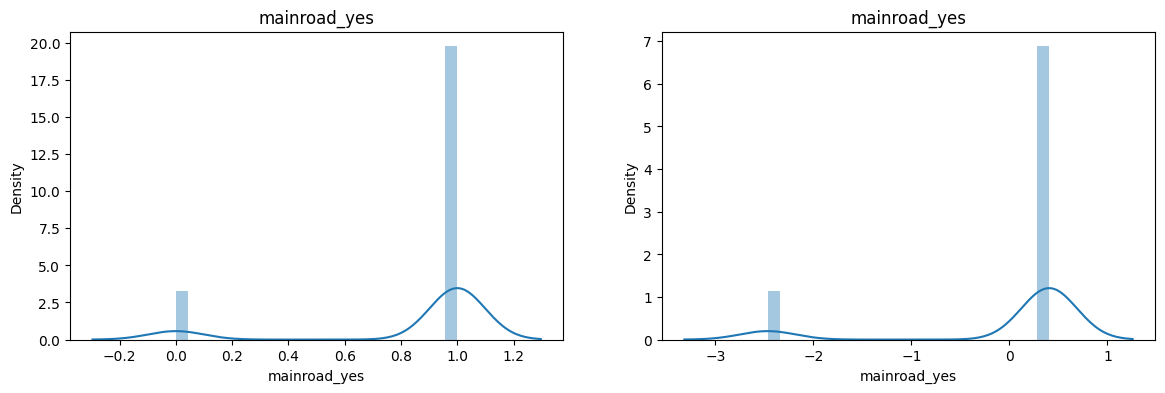

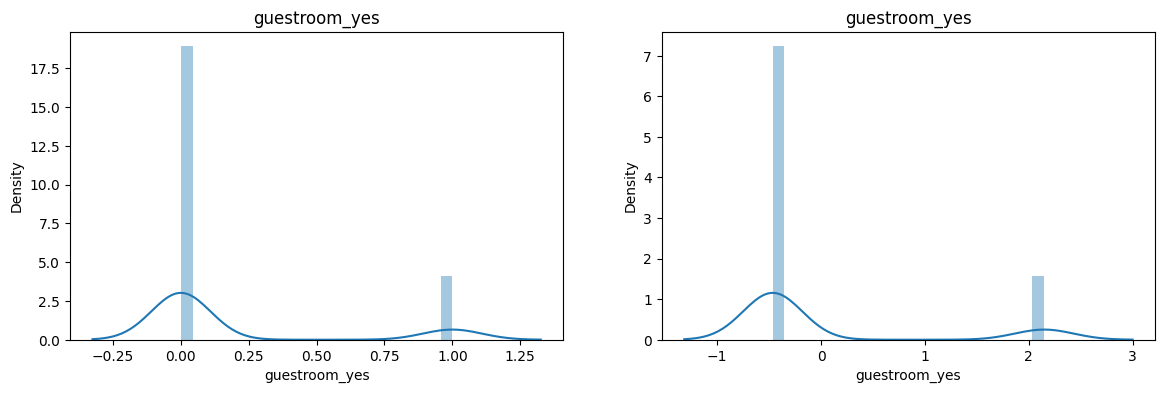

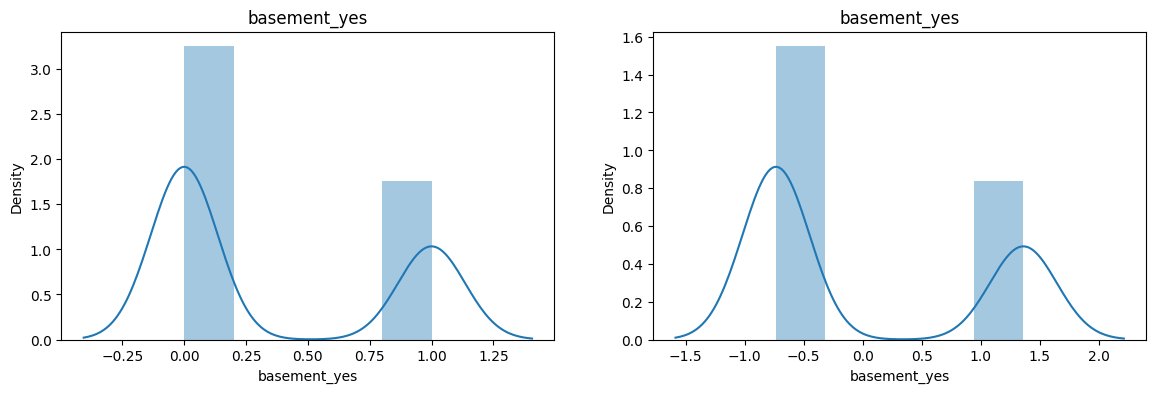

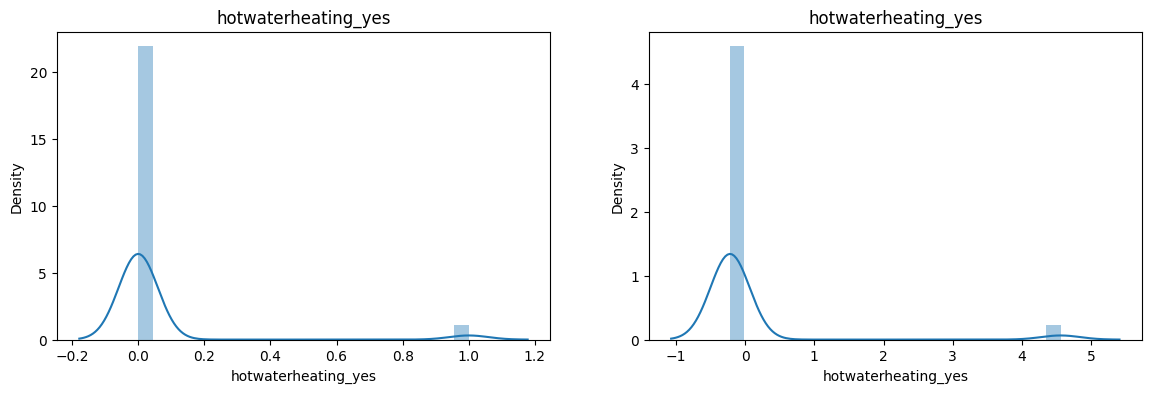

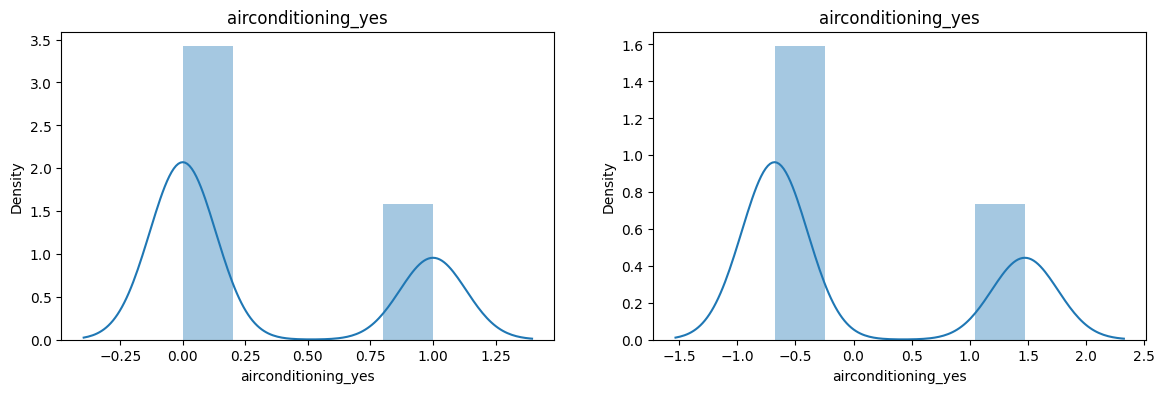

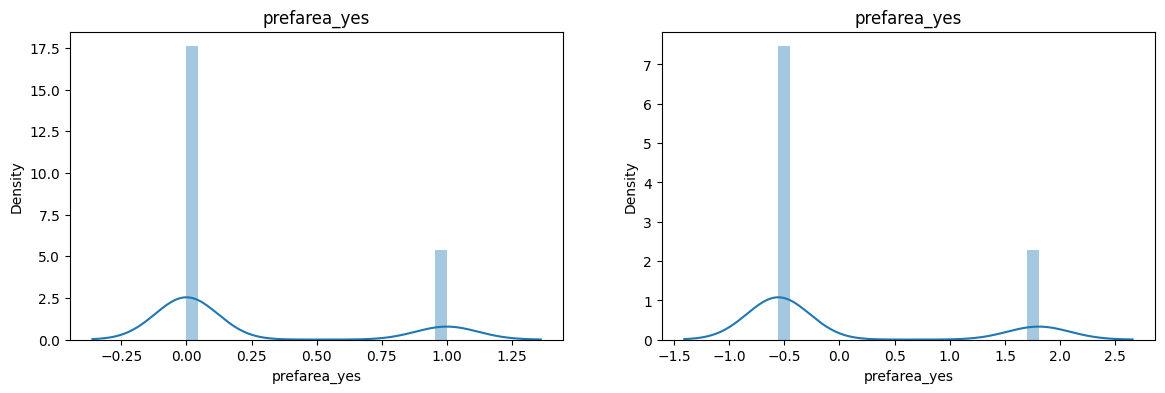

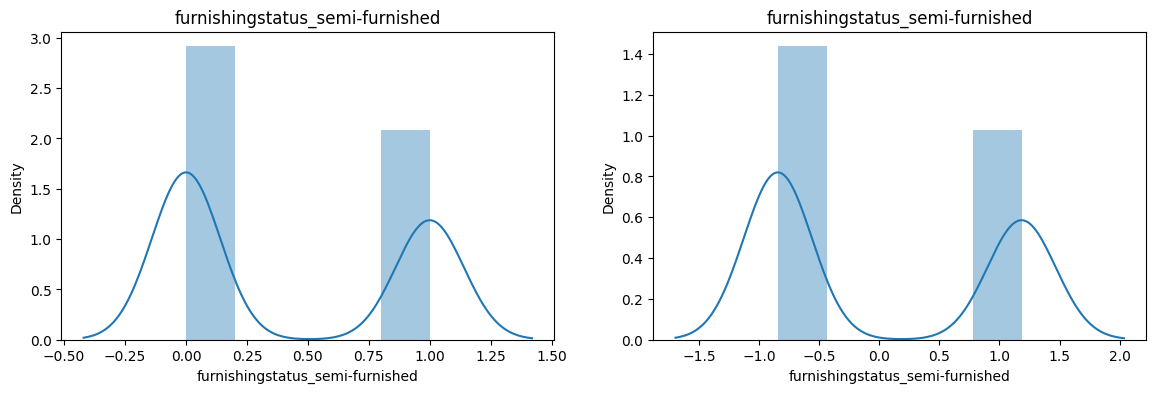

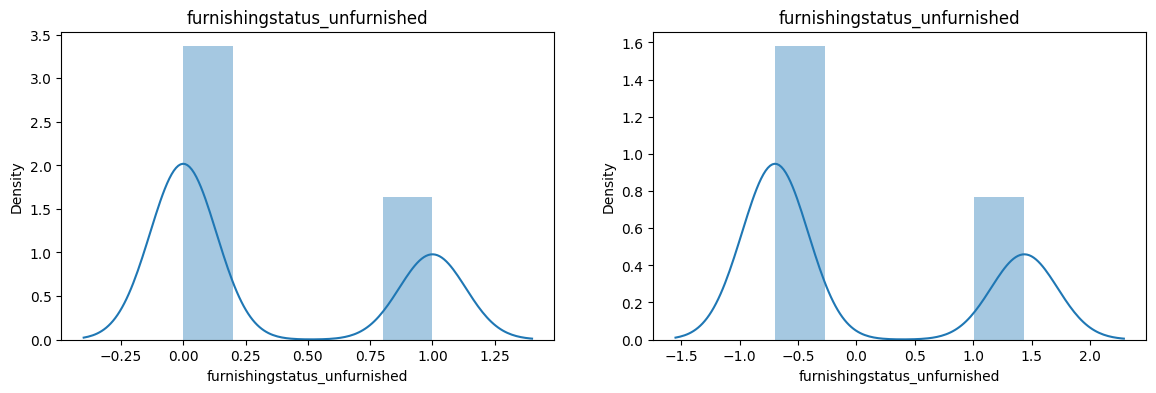

In [46]:
# Before and after comparision for Box-Cox Plot
for col in x_qwt.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(x_qwt[col])
    plt.title(col)

    plt.show()

In [47]:
# For Feature selection (FS) using varianceThreshold & mutual_info_reg technique
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression

In [48]:
# Using varianceThreshold technique for FS
vt = VarianceThreshold(threshold=(.7 * (1 - .7)))
vt.fit_transform(x_qwt)

array([[ 1.11544653,  1.35215387,  1.66190295, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.55959769,  1.35215387,  1.76091829, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 1.80429537,  0.12210919,  1.66190295, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.67254854, -1.38907995, -0.59920804, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.2486013 ,  0.12210919, -0.59920804, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.51280236,  0.12210919, -0.59920804, ..., -0.55403469,
        -0.84488844,  1.43589615]])

In [49]:
# VarianceTheshold given column names
vt.feature_names_in_

array(['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes',
       'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype=object)

In [50]:
# VarianceTheshold variance values
vt.variances_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
# Using mutual_info_reg technique for FS
mi = mutual_info_regression(x_qwt, y)

In [52]:
# Convert mutual values into cols
imp = pd.Series(mi, x_qwt.columns[0:len(x_qwt.columns)])

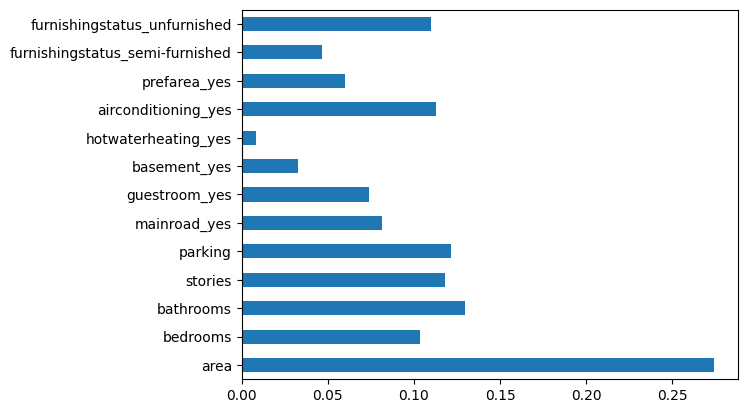

In [53]:
# Display the FS graph
imp.plot(kind='barh')
plt.show()

## 4. Model Building, Validation & Evaluation

In [54]:
# Split arrays or matrices into random train and test subsets.
# Evaluate a score by cross-validation.
# Exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Ordinary least squares Linear Regression.
# Linear model fitted by minimizing a regularized empirical loss with SGD.
from sklearn.linear_model import LinearRegression, SGDRegressor

# Mean absolute error regression loss.
# Mean squared error regression loss.
# R2 (coefficient of determination) regression score function.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
x_qwt.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.115447,1.352154,1.661903,1.306486,1.132212,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,-0.844888,-0.696429
1,1.559598,1.352154,1.760918,1.779295,1.167767,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-0.844888,-0.696429
2,1.804295,0.122109,1.661903,0.538132,1.132212,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,1.183588,-0.696429
3,1.140981,1.352154,1.661903,0.538132,1.167767,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,-0.844888,-0.696429
4,1.115447,1.352154,-0.599208,0.538132,1.132212,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,-0.844888,-0.696429


In [56]:
# Split featues into X and y
X = x_qwt
y = y

In [57]:
# Use train_test_split to divide the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [58]:
# Train Linear Reg model
model = LinearRegression()

In [59]:
# Testing with cross-val_score
score = np.round(cross_val_score(model, X_train, y_train, cv=10, ), 2)
mean_score = np.round(np.mean(score), 2)

In [60]:
# Test Linear Reg score
print(f'Model score :\n {score}')
print(f'Model mean score :\n {mean_score}')

Model score :
 [0.59 0.72 0.67 0.64 0.77 0.63 0.73 0.65 0.6  0.51]
Model mean score :
 0.65


In [61]:
# For adjusted R2 score
# Number of rows (109)
# Total number of dependent columns (12)
X_test.shape

(109, 13)

In [64]:
# Train and test the model
def trained_model(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    mae = np.round(mean_absolute_error(y_test, y_pred), 2)
    mse = np.round(mean_squared_error(y_test, y_pred), 2)
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    r2 = np.round(r2_score(y_test, y_pred), 2)
    ad_r2 = np.round(1-((1-r2)*(109-1) / (109-1-12)), 2)

    print('Name :\n',clf)
    print('mean_absolute_err :\n',mae)
    print('mean_squared_err :\n',mse)
    print('rooted_mean_squared_err :\n',rmse)
    print('r2_score :\n',r2)
    print('adjusted_r2_score :\n',ad_r2)
    
    # Model detail
    print(f" Training Model score :\n {np.round(clf.score(x_train, y_train), 2)}")
    print(f" Testing Model score :\n {np.round(clf.score(x_test, y_test), 2)}")
    print(f" Model coeffecient :\n {np.round(clf.coef_, 2)}")
    print(f" Model intercept :\n {np.round(clf.intercept_, 2)}")

In [65]:
# Trained Liner Reg model
trained_model(model,X_train,y_train,X_test,y_test)

Name :
 LinearRegression()
mean_absolute_err :
 898214.23
mean_squared_err :
 1264311332569.53
rooted_mean_squared_err :
 1124416.0
r2_score :
 0.58
adjusted_r2_score :
 0.53
 Training Model score :
 0.68
 Testing Model score :
 0.58
 Model coeffecient :
 [[ 659911.62   85177.24  494735.31  285236.03  228259.3   125659.
    26502.21  189612.46  155597.39  421044.17  275042.83  -84199.27
  -232248.4 ]]
 Model intercept :
 [4755028.08]


In [ ]:
# Perform the GridSearchCV for best hyperparameter
params = {
    'loss' :['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
    'penalty' :['l2', 'l1'], 
    'alpha' :[0.1, 0.0001, 0.001, 0.01, 0.0005, 0.005], 
#     'l1_ratio' :[0.0001, 0.001, 0.15],
    'max_iter' :[100, 300, 700,1000,1500,2000], 
    'tol' :[0.1,0.001,0.01, 0.00001, 0.5, 0.005], 
#     'epsilon' :[0.000001,0.001,0.1], 
    'learning_rate' :['invscaling', 'constant', 'optimal', 'adaptive'], 
    'eta0' :[0.1,0.001,0.00001,0.01,0.05,0.005], 
}
grid_srh = GridSearchCV(estimator= sgd_model, param_grid=params, cv=3)

In [ ]:
# # Train with different hyperparameter
# grid_srh.fit(X_train, y_train)
# # Best hyperparameter
# print('Best hyperparameters :\n',grid_srh.best_params_)
# # Best hyperparameters :
# #  {'alpha': 0.005, 'eta0': 0.005, 'learning_rate': 'adaptive', 'loss': 'squared_epsilon_insensitive', 
# #   'max_iter': 100, 'penalty': 'l2', 'tol': 0.001}

In [66]:
# Train and test the model 
sgd_model = SGDRegressor(max_iter=1000, alpha=0.005, eta0=0.005, learning_rate='adaptive')
# Trained SGD model
trained_model(sgd_model,X_train,y_train,X_test,y_test)

Name :
 SGDRegressor(alpha=0.005, eta0=0.005, learning_rate='adaptive')
mean_absolute_err :
 896722.43
mean_squared_err :
 1262326271254.48
rooted_mean_squared_err :
 1123532.94
r2_score :
 0.58
adjusted_r2_score :
 0.53
 Training Model score :
 0.68
 Testing Model score :
 0.58
 Model coeffecient :
 [ 656382.79   84583.58  493019.63  285251.47  228421.62  127176.63
   25356.52  190965.15  154747.65  420526.67  275464.25  -83936.92
 -231097.71]
 Model intercept :
 [4754928.32]


## 5. Model Testing

In [67]:
# Last 8 rows of dependent data
X.tail(8)

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
537,-2.734811,0.122109,-0.599208,0.538132,-0.906820,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,1.435896
538,-0.651788,-1.389080,-0.599208,-1.110042,-0.906820,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,1.435896
539,-1.176196,-1.389080,-0.599208,-1.110042,1.070216,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,1.435896
540,-1.167299,-1.389080,-0.599208,-1.110042,1.132212,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.554035,-0.844888,1.435896
541,-1.770061,0.122109,-0.599208,-1.110042,-0.906820,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,1.183588,-0.696429
542,-0.672549,-1.389080,-0.599208,-1.110042,-0.906820,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,1.435896
543,-1.248601,0.122109,-0.599208,-1.110042,-0.906820,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,-0.696429
544,-0.512802,0.122109,-0.599208,0.538132,-0.906820,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,-0.844888,1.435896


In [68]:
# Last 8 rows of independent data
y.tail(8)

,price
537,1890000
538,1890000
539,1855000
540,1820000
541,1767150
542,1750000
543,1750000
544,1750000


In [69]:
y.loc[540]

price    1820000
Name: 540, dtype: int64

In [70]:
# User Input data
# values -1.167299,-1.389080,-0.599208,-1.110042,1.132212,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.554035,-0.844888,1.435896
user = np.array([-1.167299,-1.389080,-0.599208,-1.110042,1.132212,0.405623,-0.465315,1.361397,-0.219265,-0.679063,-0.554035,-0.844888,1.435896]).reshape(1, -1)
user

array([[-1.167299, -1.38908 , -0.599208, -1.110042,  1.132212,  0.405623,
        -0.465315,  1.361397, -0.219265, -0.679063, -0.554035, -0.844888,
         1.435896]])

In [76]:
# That function tell the model prediction
def prediction(clf,vals):
    pred = clf.predict(vals)[0]
    print('Name :\n', clf)
    print('Predicted amount :\n', np.round(pred,2))

In [77]:
# Linear Regression model prediction
prediction(model, user)

Name :
 LinearRegression()
Predicted amount :
 [3073775.08]


In [78]:
# Stochastic Gradient Descent model prediction
prediction(sgd_model,user)

Name :
 SGDRegressor(alpha=0.005, eta0=0.005, learning_rate='adaptive')
Predicted amount :
 3084538.99


## 6. Model Improvement

In [ ]:
# Drop un-necessary cols ''
x_qwt.drop(columns=['basement_yes','hotwaterheating_yes', 'mainroad_yes'], axis=1, inplace=True)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
Z = house_df.drop(columns=['price'], axis=1)
calc_vif(Z)

In [ ]:
# Feature Engineering
house_df['house_structure'] = house_df['bedrooms'] + house_df['bathrooms'] + house_df['stories'] + house_df['parking']
# Drop the cols
house_df.drop(columns=['bedrooms', 'bathrooms', 'stories', 'parking'], axis=1, inplace=True)
# Display the rows of data
house_df.head()

In [ ]:
# Again check multicollinearity between correlated features:
Z = house_df.drop(columns=['price'], axis=1)
calc_vif(Z)

In [ ]:
# Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:
Z = house_df.drop(columns=['house_structure','price'], axis=1)
calc_vif(Z)

In [ ]:
# Combine the correlated variables into one and drop the others. This will reduce the multicollinearity.
house_df['house'] = house_df.apply(lambda x: x['area'] - x['house_structure'], axis=1)
# Drop cols
house_df.drop(columns=['area', 'house_structure'], axis=1, inplace=True)
# Show data
house_df.head()

In [ ]:
# Again check multicollinearity between correlated features:
Z = house_df.drop(columns=['price'], axis=1)
calc_vif(Z)

In [ ]:
# Combine the correlated variables into one and drop the others. This will reduce the multicollinearity.
house_df['house_mainroad'] = house_df.apply(lambda x: x['house'] - x['mainroad_yes'], axis=1)
# Drop the col
house_df.drop(columns=['house', 'mainroad_yes'], axis=1, inplace=True)
# Top 5 rows of data
house_df.head()

In [ ]:
# Again check multicollinearity between correlated features:
Z = house_df.drop(columns=['price'], axis=1)
calc_vif(Z)

In [ ]:
# Standardize features by removing the mean and scaling
# Scale features using statistics that are robust to outliers.
from sklearn.preprocessing import RobustScaler, StandardScaler
scale = StandardScaler()
scale.set_output(transform='pandas')

In [ ]:
# Scaling independent features
x_scale = scale.fit_transform(x)

In [ ]:
# Graph Distplot of numerical data
for cols in x_scale.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_qwt[cols])
    plt.title(cols)

    plt.subplot(122)
    sns.distplot(x_scale[cols])
    plt.title(cols)

    plt.show()